<div style="display: flex; justify-content: center; align-items: center; gap: 20px;">
  <img src="https://francia.unam.mx/wp-content/uploads/2021/10/Logo-UNAM-Azul-Landscape.png" alt="UNAM" width="225" height="125">
  <img src="https://mcdonaldinstitute.ca/wp-content/uploads/2018/05/PI-logo-2017-Black-1280x424.png.webp" alt="Perimeter" width="200" height="100">
  <img src="https://swanseauniversity.cloud.panopto.eu/Panopto/ContentCache/637582254009215017/_branding/f80a49ed-5120-415e-89fe-ab8900ad7d40/637582253354333331_largelogo.png" alt="Swansea" width="225" height="125">
</div>


<h1 align="center">
Gravitational Waves from Hyperbolic Encounter of <br>
Primordial Black Holes in Dwarf Galaxies
</h1>

<div style="display: flex; justify-content: center; align-items: center; gap: 20px;">
 <img src= "https://tadeodaguilar.netlify.app/project/pytorch/featured_hu5e8d079b00a124ce2d95e415b65e7659_32709_2bc9360503bcbcbfe707734df06983d9.webp" alt="Herichical" width="200" height="100">
</div>

<h3 align="center">
Tadeo D. Gómez-Aguilar $^{a,\dagger}$, Encieh Erfani $^{b}$ and Nayeli Marisol Jiménez Cruz $^{c}$
</h3>

#### $^{a}$Instituto de Ciencias Físicas, Universidad Nacional Autónoma de México, 62210, Cuernavaca, Morelos, México. $^{b}$Perimeter Institute for Theoretical Physics, Waterloo, ON N2L 2Y5, Canada. $^{c}$Physics Department, Swansea University, SA28PP, United Kingdom.


**Abstract**
<div style="background-color: #ffe4e1; padding: 10px;">
We investigate the Stochastic Gravitational Wave Background (SGWB) generated by Close Hyperbolic Encounters (CHEs) of Primordial Black Holes (PBHs) within dark matter-dominated dwarf galaxies. Building upon our previous work, this study incorporates the full hierarchical merger history of PBHs to evaluate their cumulative contribution to the SGWB. Our framework identifies the conditions under which gravitational waves from CHEs
and successive PBH mergers become significant components of the observable SGWB, and allows for a direct comparison with signals from standard PBH mergers. We determine the parameter space in which these signals may be detected by next-generation gravitational wave observatories, including the Einstein Telescope, LISA, Pulsar Timing Arrays (PTAs), and the Square Kilometre Array (SKA). Furthermore, we present numerical criteria that define the validity range of our analytical models.
</div>


**Corresponse author:**
[tadeo.dga@icf.unam.mx](mailto:tadeo.dga@icf.unam.mx)$^{\dagger}$

<h3 align="center">
Code writed by Tadeo D.
</h3>

<h4 align="center">
$M_{\rm PBH} = 1\times10^{-14} M_{\odot}$
</h4>
    
    
<h5 align="right">
Dedicated to Elizabeth América Flores Frías.
</h5>

BOUNDARY CONDITIONS TO CLUSTER
100700.0 1.007e+19
radius (pc)    n_pbh(r) [1/pc^3]
0.10           1.80e+18
0.21           1.70e+18
0.32           1.50e+18
0.43           1.30e+18
0.54           1.00e+18
0.65           8.40e+17
0.76           6.70e+17
0.88           5.30e+17
0.99           4.10e+17
1.10           3.20e+17
Total number of PBHs (integrated): 1.01e+19


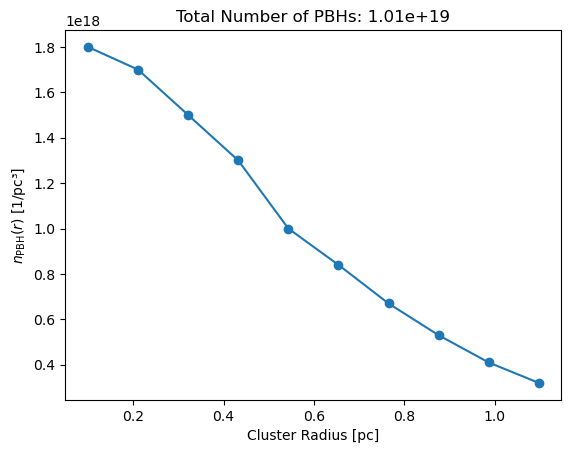

In [1]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
from itertools import combinations_with_replacement
from astropy.cosmology import Planck18 as cosmo
from astropy.cosmology import z_at_value
import astropy.units as u
from astropy import constants as cte0

# --- Constantes ---
c = 299792458  # m/s
c_ast = 299792.458  # km/s
G = 6.6743e-11  # m^3 / (kg s^2)
G_ast = cte0.G.to(u.pc**3 / (u.M_sun * u.s**2)).value  # mejor usando astropy

# --- Parámetros del cúmulo ---
M_PBH = 1e-14          # Masa de cada PBH [M_sun]
M_DM_cluster_real = 1e5     # Masa total del cúmulo [M_sun]
#N_PBH_total = M_DM_cluster / M_PBH
R_cluster = 1.09738581    # Radio del cúmulo [pc]
r_values_pc = np.linspace(0.1, R_cluster, 10)  # radios de evaluación


print("BOUNDARY CONDITIONS TO CLUSTER")
#print(f"Number of PBHs into cluster: {N_PBH_total:.2e} of {M_PBH:.1e} M_sun")
#print(f"Cluster radius (parsecs): {R_cluster:.2f}")

# --- Funciones físicas ---
def rho(r):
    """Densidad de masa (perfil tipo Plummer) en M_sun / pc^3"""
    factor = (3 * M_DM_cluster_real) / (4 * np.pi * R_cluster**3)
    shape = 1 + (r / R_cluster)**2
    return factor * shape**(-2.5)

def n_pbh(r, M_pbh):
    """Densidad numérica de PBHs en 1/pc^3"""
    return rho(r) / M_pbh

# Densidad numérica radial (almacenada ya redondeada en 2 cifras significativas)
n_PBH_r = np.array([float(f"{n_pbh(r, M_PBH):.1e}") for r in r_values_pc])

# Número total de PBHs integrando en volumen
n_total = np.sum(n_PBH_r)

N_PBH_total = np.sum(n_PBH_r)
M_DM_cluster = (N_PBH_total * M_PBH)
print(M_DM_cluster, N_PBH_total)

# --- Imprimir ---
print(f"{'radius (pc)':<15}{'n_pbh(r) [1/pc^3]'}")
print("=" * 40)
for r, n in zip(r_values_pc, n_PBH_r):  
    print(f"{r:<15.2f}{n:.2e}")

print("=" * 40)
print(f"Total number of PBHs (integrated): {n_total:.2e}")

# --- Graficar ---
plt.plot(r_values_pc, n_PBH_r, marker="o")
plt.xlabel("Cluster Radius [pc]")
plt.ylabel(r"$n_\mathrm{PBH}(r)$ [1/pc³]")
plt.title(f"Total Number of PBHs: {n_total:.2e}")
plt.show()

In [2]:
def phi(r, M_cluster):
    phi_r = ((G_ast * M_cluster / R_cluster) * (1 + (r / R_cluster)**2)**(-0.5))
    return phi_r * 9.5214e26 # km^2/s^2

def f_E(E, N_pbh, M_cluster):
    E = E / 9.5214e26
    num = 24 * np.sqrt(2) * N_pbh * R_cluster**2 * E**(3.5)
    denom = 7 * np.pi**3 * G_ast**5 * M_cluster**5
    return (num / denom) * 3.404e-41

def integrand(E_val, r, N_pbh, M_cluster):
    phi_val = phi(r, M_cluster)
    delta_E = 2 * (phi_val - E_val)
    return f_E(E_val, N_pbh, M_cluster) * delta_E**1.5

def mean_square_velocity(r, M_cluster, N_pbh, M_pbh):
    n_r = (rho(r) / M_pbh)
    if n_r == 0:
        return 0.0
    phi_r = phi(r, M_cluster)
    integral, _ = spi.quad(integrand, 0, phi_r, args=(r, N_pbh, M_cluster))
    return np.sqrt((4 * np.pi / n_r) * integral)

In [3]:
v_mean_values = np.array([
    mean_square_velocity(r, M_DM_cluster, N_PBH_total, M_PBH)
    for r in r_values_pc
])

for r, v in zip(r_values_pc, v_mean_values):
    print(f"r = {r:.2f},  v_rms = {v:.3f}")

v_0 = np.mean(v_mean_values) #(u.km / u.s)

print(f"\n v0 = {v_0:.3f}")

r = 0.10,  v_rms = 14.068
r = 0.21,  v_rms = 13.970
r = 0.32,  v_rms = 13.810
r = 0.43,  v_rms = 13.598
r = 0.54,  v_rms = 13.346
r = 0.65,  v_rms = 13.066
r = 0.76,  v_rms = 12.769
r = 0.88,  v_rms = 12.463
r = 0.99,  v_rms = 12.157
r = 1.10,  v_rms = 11.854

 v0 = 13.110


In [4]:
km_to_pc = 1 / 3.085677581e13 
# --- Secciones eficaces ---
def sigma_BPBH(m1, m2, v_i, v_j):
    G_astro = G_ast
    c_astro = c_ast
    prefactor = (340 * np.pi / 3)**(2/7)
    num = np.pi * prefactor * G_astro**2 * (m1 + m2)**(10/7) * (m1 * m2)**(2/7)
    if v_i == v_j:
        denom = c_astro**(10/7) * np.abs(v_0)**(18/7)
    else:
        denom = c_astro**(10/7) * (np.abs(v_i - v_j))**(18/7)
    return (num / denom) * (3.085677581e13)**4

def sigma_CHES(m1, m2, v_i, v_j):
    G_astro = G_ast
    e = 1.000001
    if v_i == v_j:
        b = (G_astro * (m1 + m2) / v_i**2)
    else:
        b = (G_astro * (m1 + m2) / (np.abs(v_i - v_j))**2)
    b = b / (3.085677581e13**-2)
    return np.pi * b**2 * (e**2 - 1)

In [5]:
# División simple del total en dos subpoblaciones
N_PBH_i_Msun = M_DM_cluster / (2 * M_PBH)
N_PBH_j_Msun = M_DM_cluster / (2 * M_PBH)


# --- Integral I ---
def integrand_I(r_i, r_j, N_pbh_i, M_pbh_i, N_pbh_j, M_pbh_j, M_cluster):
    if M_pbh_i == M_pbh_j:
        n_i = n_pbh(r_i, M_pbh_i) / 2
        n_j = n_i
        v_i = mean_square_velocity(r_i, M_cluster, 2*N_pbh_i, M_pbh_i) * km_to_pc
        v_j = v_i
    else:
        n_i = n_pbh(r_i, M_pbh_i)
        v_i = mean_square_velocity(r_i, M_cluster, N_pbh_i, M_pbh_i) * km_to_pc
        v_j = mean_square_velocity(r_j, M_cluster, N_pbh_j, M_pbh_j) * km_to_pc
    term = (v_j + v_i)**(3/7) - abs(v_j - v_i)**(3/7)
    return r_i**2 * (n_i / v_i) * term

def I_rj(r_j, N_pbh_i, M_pbh_i, N_pbh_j, M_pbh_j, M_cluster):
    args = (r_j, N_pbh_i, M_pbh_i, N_pbh_j, M_pbh_j, M_cluster)
    integral, _ = spi.quad(integrand_I, 0.1 * R_cluster, R_cluster, args=args)
    return integral

I_values = np.array([I_rj(r_j, N_PBH_i_Msun, M_PBH, N_PBH_j_Msun, M_PBH, M_DM_cluster) for r_j in r_values_pc])
coeffs = np.polyfit(r_values_pc, I_values, 3)

In [6]:
# --- Gamma ---
def Gamma_rj(r_j, N_pbh_j, M_pbh_j, N_pbh_i, M_pbh_i, M_cluster):
    n_j = n_pbh(r_j, M_pbh_j)
    v_j = mean_square_velocity(r_j, M_cluster, N_pbh_j, M_pbh_j) * km_to_pc
    v_i = mean_square_velocity(r_j, M_cluster, N_pbh_i, M_pbh_i) * km_to_pc
    sigma_B = sigma_BPBH(M_pbh_i, M_pbh_j, v_i/km_to_pc, v_j/km_to_pc)
    sigma_C = sigma_CHES(M_pbh_i, M_pbh_j, v_i/km_to_pc, v_j/km_to_pc)
    if v_j == 0 or n_j == 0:
        return 0, 0
    I_val = np.polyval(coeffs, r_j)
    if v_i == v_j:
        v_mean_values = np.array([
            mean_square_velocity(r, M_DM_cluster, N_pbh_i*2, M_pbh_i)
            for r in r_values_pc]
        )
        v_0 = np.mean(v_mean_values) * km_to_pc
        gamma_BBH = (v_0)**(18/7) * (14 * np.pi / 3) * sigma_B * (n_j / v_j) * I_val
        gamma_CHE = (v_0)**(18/7) * (14 * np.pi / 3) * sigma_C * (n_j / v_j) * I_val
    else:
        gamma_BBH = (np.abs(v_i - v_j))**(18/7) * (14 * np.pi / 3) * sigma_B * (n_j / v_j) * I_val
        gamma_CHE = (np.abs(v_i - v_j))**(18/7) * (14 * np.pi / 3) * sigma_C * (n_j / v_j) * I_val
    return gamma_BBH, gamma_CHE

r = 0.100 pc | Gamma_BBH = 4.667e-18 [1/s] | Gamma_CHE = 1.318e-17 [1/s]
r = 0.211 pc | Gamma_BBH = 4.382e-18 [1/s] | Gamma_CHE = 1.273e-17 [1/s]
r = 0.322 pc | Gamma_BBH = 3.950e-18 [1/s] | Gamma_CHE = 1.202e-17 [1/s]
r = 0.432 pc | Gamma_BBH = 3.436e-18 [1/s] | Gamma_CHE = 1.112e-17 [1/s]
r = 0.543 pc | Gamma_BBH = 2.903e-18 [1/s] | Gamma_CHE = 1.013e-17 [1/s]
r = 0.654 pc | Gamma_BBH = 2.399e-18 [1/s] | Gamma_CHE = 9.109e-18 [1/s]
r = 0.765 pc | Gamma_BBH = 1.950e-18 [1/s] | Gamma_CHE = 8.120e-18 [1/s]
r = 0.876 pc | Gamma_BBH = 1.569e-18 [1/s] | Gamma_CHE = 7.195e-18 [1/s]
r = 0.987 pc | Gamma_BBH = 1.254e-18 [1/s] | Gamma_CHE = 6.353e-18 [1/s]
r = 1.097 pc | Gamma_BBH = 9.995e-19 [1/s] | Gamma_CHE = 5.601e-18 [1/s]


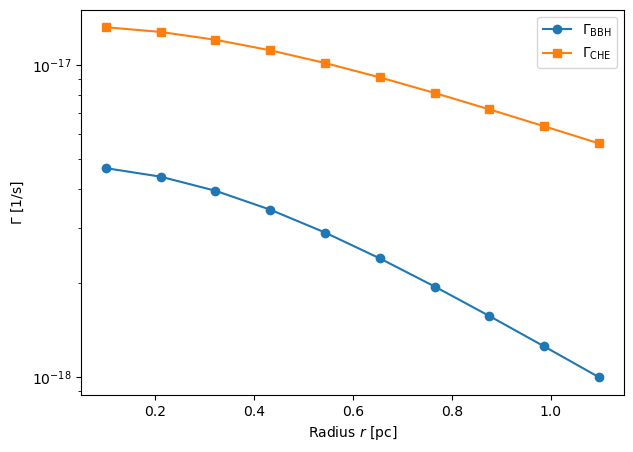

In [7]:
Gamma_BBH_values = np.array([
    Gamma_rj(r_j, N_PBH_j_Msun, M_PBH, N_PBH_i_Msun, M_PBH, M_DM_cluster)[0]
    for r_j in r_values_pc
])

Gamma_CHES_values = np.array([
    Gamma_rj(r_j, N_PBH_j_Msun, M_PBH, N_PBH_i_Msun, M_PBH, M_DM_cluster)[1]
    for r_j in r_values_pc
])

for r, g_bbh, g_che in zip(r_values_pc, Gamma_BBH_values, Gamma_CHES_values):
    print(f"r = {r:.3f} pc | Gamma_BBH = {g_bbh:.3e} [1/s] | Gamma_CHE = {g_che:.3e} [1/s]")

# Graficar
plt.figure(figsize=(7,5))
plt.plot(r_values_pc, Gamma_BBH_values, 'o-', label=r'$\Gamma_{\mathrm{BBH}}$')
plt.plot(r_values_pc, Gamma_CHES_values, 's-', label=r'$\Gamma_{\mathrm{CHE}}$')
plt.xlabel("Radius $r$ [pc]")
plt.ylabel(r"$\Gamma$ [1/s]")
plt.yscale('log')
plt.legend()
plt.show()

In [8]:
# Edad del universo
age_universe_Gyr = 13.786885302009708  # Gyr
age_universe_yr = age_universe_Gyr * 1e9  # yr

# Conversión de tasas a unidades por año
seconds_per_year = 3.15576e7  # s/yr
Gamma_BBH_values_yr = Gamma_BBH_values * seconds_per_year
Gamma_CHES_values_yr = Gamma_CHES_values * seconds_per_year

time_first_merger_yr =  1/Gamma_BBH_values_yr
time_first_merger_Gyr = time_first_merger_yr / 1e9

time_first_ches_yr = 1/Gamma_CHES_values_yr
time_first_ches_Gyr = time_first_ches_yr / 1e9

In [9]:
print(f"{'Gamma_BPBH(yr^-1)':<20}{'Time to 1st merger (Gyr)':<28}{'Gamma_CHES(yr^-1)':<20}{'Time to 1st CHEs (yr)':<28}")
print("=" * 90)
for i in range(len(r_values_pc)):
    print(f"{Gamma_BBH_values_yr[i]:<20.3e}{time_first_merger_Gyr[i]:<28.3e}{Gamma_CHES_values_yr[i]:<20.3e}{time_first_ches_yr[i]:.3e}")


time_z_20 = cosmo.age(20).to(u.yr).value
delta_t_merger = np.min(time_first_merger_yr)
print("\nTime necessary to all PBHs\nfrom first radius coallesences:", delta_t_merger/1e9, "Gyr")

delta_t_CHEs = np.min(time_first_ches_yr)# + time_z_20
print("\nTime necessary to maximum probability\nto produces CHEs in the first shell: ",delta_t_CHEs,"years")

Gamma_BPBH(yr^-1)   Time to 1st merger (Gyr)    Gamma_CHES(yr^-1)   Time to 1st CHEs (yr)       
1.473e-10           6.790e+00                   4.160e-10           2.404e+09
1.383e-10           7.231e+00                   4.017e-10           2.489e+09
1.246e-10           8.023e+00                   3.792e-10           2.637e+09
1.084e-10           9.223e+00                   3.510e-10           2.849e+09
9.162e-11           1.091e+01                   3.196e-10           3.129e+09
7.571e-11           1.321e+01                   2.875e-10           3.479e+09
6.155e-11           1.625e+01                   2.562e-10           3.903e+09
4.951e-11           2.020e+01                   2.270e-10           4.404e+09
3.957e-11           2.527e+01                   2.005e-10           4.988e+09
3.154e-11           3.170e+01                   1.767e-10           5.658e+09

Time necessary to all PBHs
from first radius coallesences: 6.790205905552305 Gyr

Time necessary to maximum probability
to

In [10]:
# --- Constantes ---
G_SI = 6.67430e-11             # m³ / (kg·s²)
c_SI = 2.99792458e8            # m/s
Msun_kg = 1.98847e30           # kg
pc_m = 3.085677581e16          # m
AU_m = 1.495978707e11          # m
erg_in_joule = 1e-7            # 1 erg = 1e-7 J
AU_pc = AU_m / pc_m            # 1 AU in parsecs
seconds_per_year = 3.15576e7   # s/yr

In [11]:
def R_Swarzschild(m):
    return (2 * G_SI * m * Msun_kg) / c_SI**2 / pc_m

def E_rad_GW(m1, m2):
    m1_kg = m1 * Msun_kg
    m2_kg = m2 * Msun_kg

    if m1<m2:
        a0 = (2 * G_SI * m2_kg) / c_SI**2  # en m
    elif m2<m1:
        a0 = (2 * G_SI * m1_kg) / c_SI**2
    else:
        a0 = (2 * G_SI * m1_kg) / c_SI**2

    a1 = 0.01 * AU_m  # en m

    E_joules = (G_SI * m1_kg * m2_kg / 2) * (1/a0 - 1/a1)
    return E_joules / erg_in_joule  # erg


# --- Masa final tras fusión BBH ---
def final_mass_GW(m1, m2):
    E_rad = E_rad_GW(m1, m2) * erg_in_joule  # J
    m_total = (m1 + m2) * Msun_kg
    m_final = m_total - E_rad / c_SI**2
    return m_final / Msun_kg  # M_sun

# --- Radio mínimo para CHES (en parsecs) ---
def r_min_CHES(m1, m2):
    m1_kg = m1 * Msun_kg
    m2_kg = m2 * Msun_kg
    R_sch = lambda m: 2 * G_SI * m / c_SI**2  # m
    #return K * (R_sch(m1_kg) + R_sch(m2_kg)) / pc_m  # pc
    return (G_SI * (m1_kg + m2_kg) / (v_0*1e3)**2) / pc_m

# --- Energía radiada CHES ---
def E_rad_CHES(m1, m2, e=1.000001):
    m1_kg = m1 * Msun_kg
    m2_kg = m2 * Msun_kg
    M = m1_kg + m2_kg
    r_min_m = r_min_CHES(m1, m2) * pc_m  # m

    # f(e) factor (Eq. 18)
    term1 = 24 * np.arccos(-1 / e) * (1 + (73/24)*e**2 + (37/96)*e**4)
    term2 = np.sqrt(e**2 - 1) * (301/6 + (673/12)*e**2)
    f_e = (1 / (1 + e)**(7/2)) * (term1 + term2)

    E_rad = (8/15) * G_SI**(3.5) * np.sqrt(M) * m1_kg**2 * m2_kg**2 / (c_SI**5 * r_min_m**(3.5)) * f_e
    return E_rad / erg_in_joule  # erg

In [12]:
# --- Evaluación de energías y masa final ---
E_BBH_event = E_rad_GW(M_PBH, M_PBH)             # erg
E_CHES_event = E_rad_CHES(M_PBH, M_PBH)                  # erg
final_masses = final_mass_GW(M_PBH, M_PBH)       # M_sun

In [13]:
time_values_interval_0 = np.linspace(1e3, delta_t_CHEs, 500) #Years
time_values_interval_0 = np.insert(time_values_interval_0, 0, 0.0)
time_values_interval_1 = np.linspace(delta_t_CHEs, 3.3e+09, 500) #Years
time_values_interval = np.concatenate((time_values_interval_0, time_values_interval_1[1:]))

t_yr=[]
redshift_evaluated_0 = []
for t in time_values_interval:
    t_yr.append(t + time_z_20)
    t_gyr = (t + time_z_20) / 1e9  # Gyr
    z = z_at_value(cosmo.age, t_gyr * u.Gyr, zmax=22).value
    redshift_evaluated_0.append(z)

time_period_1_yr = time_values_interval[999] #yr
time_period_1_Gyr = time_values_interval[999]/1e9 #Gyr
time_period_seconds = ((time_period_1_yr * u.yr).to(u.s)).value
print(time_period_1_Gyr, time_period_seconds, redshift_evaluated_0[999])

3.3 1.0414008e+17 1.8799821607349443


In [14]:
N_CHES_0 = np.zeros_like(time_values_interval)
E_dot_CHES_0 = np.zeros_like(time_values_interval)
N_BBH_0 = np.zeros_like(time_values_interval)
E_dot_BBH_0 = np.zeros_like(time_values_interval)
BPBH_ALL_PERIOD = []
idx_first_all = None
first_bbh_idx = None
Probabilidad_total = np.zeros_like(time_values_interval)
Probabilidad_total_bbh = np.zeros_like(time_values_interval)
for i, t in enumerate(time_values_interval):
    # CHEs
    Prob_CHES_emit = Gamma_CHES_values_yr * t
    Proptot = np.sum(Prob_CHES_emit)
    Probabilidad_total[i] = Proptot
    #print("--> elapsep time(yr):",t)
    #print("Prob_CHES_r:",Prob_CHES_emit, "Proptot =", Proptot)
    N_CHES = np.round(Prob_CHES_emit * (n_PBH_r / 2))
    #print(N_CHES)
    if np.any(N_CHES == 0):
        N_CHES = np.zeros_like(Prob_CHES_emit)
    #print(N_CHES)
    if np.all(N_CHES > 0) and idx_first_all is None:
        idx_first_all = i
        print("Time necesary to obtain 1 CHEs in all radius of the Cluster:", t, "years")
        print("Time necesary to obtain 1 CHEs in all radius of the Cluster:", t/1e9, "Gyr")
        print("Redshift:", z_at_value(cosmo.age, ((t + time_z_20) / 1e9) * u.Gyr, zmax=25).value)
    N_CHES_tot = np.sum(N_CHES)
    N_CHES_0[i] = N_CHES_tot
    if t==0.:
        E_dot_CHES_shell = 0.
    else:
        E_dot_CHES_shell = (N_CHES_tot * E_CHES_event)# / (t)# * 3.15576e7)
    #print(N_CHES_tot, E_dot_CHES_shell)
    E_dot_CHES_shell_tot = np.sum(E_dot_CHES_shell)
    E_dot_CHES_0[i] = E_dot_CHES_shell_tot

    # BBH
    Prob_BPBH_form = Gamma_BBH_values_yr * t
    Proptot_bbh = np.sum(Prob_BPBH_form)
    Probabilidad_total_bbh[i] = Proptot_bbh
    #print("Prob_BBH_r:",Prob_BPBH_form, "Proptot_form_bbh =", Proptot_bbh)
    N_BBH = np.where(Prob_BPBH_form * (n_PBH_r/2) > 0.95, np.round(Prob_BPBH_form * (n_PBH_r)), 0.0)
    if np.any(N_BBH == 0):
        N_BBH = np.zeros_like(Prob_BPBH_form)
    N_BBH_tot = np.sum(N_BBH)
    if first_bbh_idx is None and N_BBH_tot > 0:
        first_bbh_idx = i
        print(f"Time necesary to obtain mergers in all radius of the Cluster: {t} years")
        print(f"Time necesary to obtain mergers in all radius of the Cluster: {t/1e9} Gyr")
        print("Redshift:", z_at_value(cosmo.age, ((t + time_z_20) / 1e9) * u.Gyr, zmax=25).value)
        #print(N_BBH)
        N_BPBH_0G = N_BBH
        #print(N_BBH_tot)
    #print("Binary in every r:", N_BBH)
    N_BBH_0[i] = N_BBH_tot
    E_dot_BBH_shell = (N_BBH * E_BBH_event) #/ (t * 3.15576e7)
    E_dot_BBH_shell_tot = np.sum(E_dot_BBH_shell)
    E_dot_BBH_0[i] = E_dot_BBH_shell_tot
print("\nIf we consider a especific time to evaluated we have:")
print(N_BBH, "\nTotal number of PBHs of the first period", N_BBH_tot)
#print(t/1e9, "Gyr")
BPBH_ALL_PERIOD.append(N_BBH_tot) #Before a total time to evaluated

Time necesary to obtain 1 CHEs in all radius of the Cluster: 1000.0 years
Time necesary to obtain 1 CHEs in all radius of the Cluster: 1e-06 Gyr
Redshift: 19.999921787299087
Time necesary to obtain mergers in all radius of the Cluster: 1000.0 years
Time necesary to obtain mergers in all radius of the Cluster: 1e-06 Gyr
Redshift: 19.999921787299087

If we consider a especific time to evaluated we have:
[8.74789378e+17 7.75793588e+17 6.16978770e+17 4.65146913e+17
 3.02347813e+17 2.09857190e+17 1.36091633e+17 8.65901469e+16
 5.35398243e+16 3.33076678e+16] 
Total number of PBHs of the first period 3.5544429230650706e+18


In [15]:
POPULATION_BPBH_BY_GENERATION = [N_BBH_tot]
EMISSION_GW_OF_BPBH = [E_dot_BBH_shell_tot]
NUMBER_OF_CHES_BY_GENERATION = [N_CHES_tot]
EMISSION_GW_OF_CHES = [E_dot_CHES_shell_tot]
PERIOD_OF_EVOLUTION_GYR = [time_period_1_Gyr]
Z_PERIOD = [redshift_evaluated_0[-1]]

print("Total number of PBHs of the first period", N_BBH_tot, "with E_GW",E_dot_BBH_shell_tot)
#print(N_BBH, "Total number of PBHs of the first period", N_BBH_tot, E_dot_BBH_shell_tot)
#print(N_CHES, "Total number of PBHs of the first period", N_CHES_tot, E_dot_CHES_shell_tot)
print("Total number of CHES of the first period", N_CHES_tot, "with E_GW", E_dot_CHES_shell_tot)
print("Duration of period (Gyr):",time_period_1_Gyr, "\nDuration of period (s):",time_period_seconds)
#print(redshift_evaluated_0[-1])

Total number of PBHs of the first period 3.5544429230650706e+18 with E_GW 1.588078632803889e+58
Total number of CHES of the first period 5.690442715682828e+18 with E_GW 6.1172946249810305e+28
Duration of period (Gyr): 3.3 
Duration of period (s): 1.0414008e+17


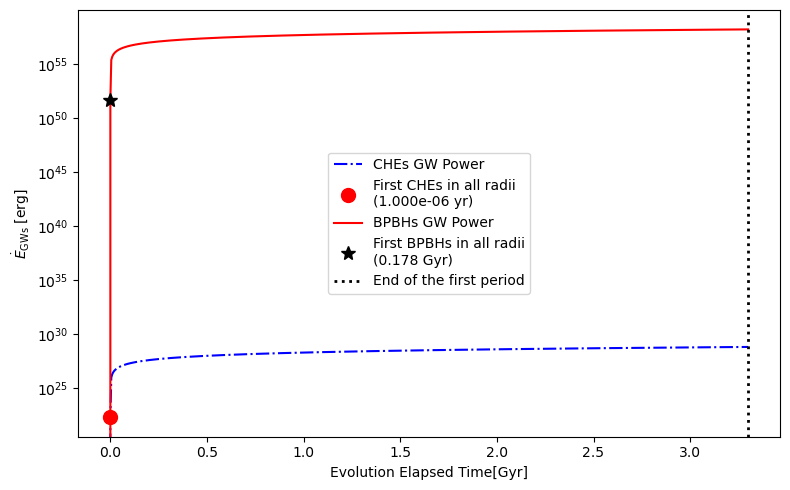

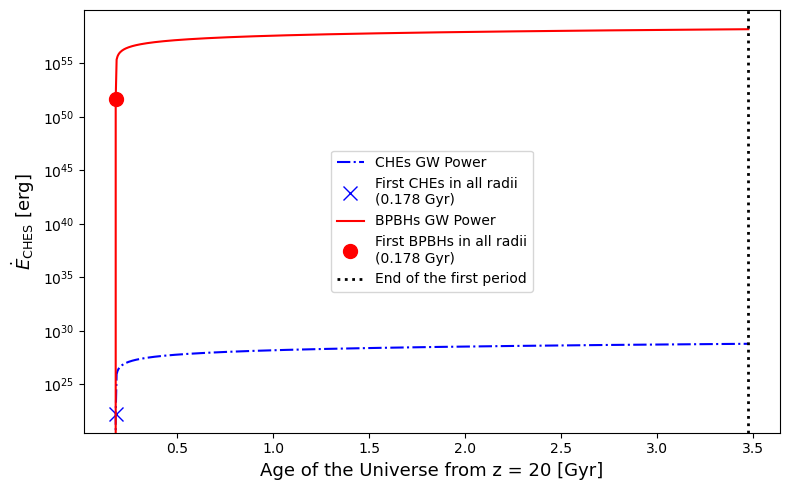

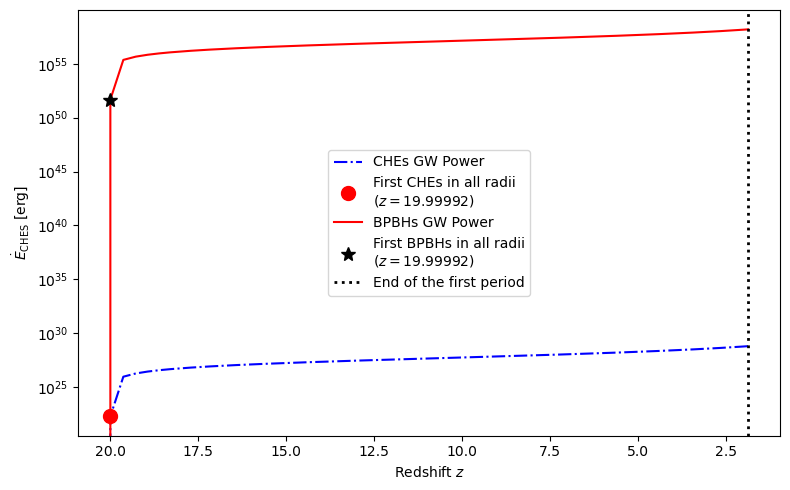

In [16]:
# Recupera los valores críticos
critical_time_yr = time_values_interval[idx_first_all]        # años
critical_time_gyr = critical_time_yr / 1e9                   # Gyr
critical_redshift = redshift_evaluated_0[idx_first_all]
critical_Edot = E_dot_CHES_0[idx_first_all]
critical_abs_age_gyr = (time_z_20 + time_values_interval[idx_first_all]) / 1e9

critical_merger_gyr = time_values_interval[first_bbh_idx]/1e9
critical_merger_redshift = redshift_evaluated_0[first_bbh_idx]
critical_merger_Edot = E_dot_BBH_0[first_bbh_idx]
critical_merger_age_gyr = (time_z_20 + time_values_interval[first_bbh_idx]) / 1e9

# --- vs tiempo evolution (en Gyr) ---
plt.figure(figsize=(8,5))
plt.plot(time_values_interval/1e9, E_dot_CHES_0, color='blue', linestyle = '-.', label='CHEs GW Power')
plt.plot(critical_time_gyr, critical_Edot, 'o', color='red', markersize=10, label=f'First CHEs in all radii\n({critical_time_yr/1e9:.3e} yr)')
plt.plot(time_values_interval/1e9, E_dot_BBH_0, color='red', label='BPBHs GW Power')
plt.plot(critical_merger_gyr, critical_merger_Edot, '*', color='black', markersize=10, label=f'First BPBHs in all radii\n({critical_merger_age_gyr:.3f} Gyr)')
plt.axvline(time_period_1_Gyr, color='black', linestyle=':', linewidth=2, label=f'End of the first period')
plt.xlabel('Evolution Elapsed Time[Gyr]')
plt.ylabel(r'$\dot{E}_{\mathrm{GWs}}$ [erg]')
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.savefig('GW_power_vs_time_evolution.pdf')
plt.show()



# --- vs edad absoluta (en Gyr) ---
plt.figure(figsize=(8,5))
plt.plot((time_z_20+time_values_interval)/1e9, E_dot_CHES_0, color='blue', linestyle = '-.', label='CHEs GW Power')
#plt.axvline(critical_abs_age_gyr, color='red', ls='--', lw=2,
#            label=f'First CHEs in all radii\n({critical_abs_age_gyr:.3f} Gyr)')
plt.plot(critical_abs_age_gyr, critical_Edot, 'x', color='blue', markersize=10, label=f'First CHEs in all radii\n({critical_abs_age_gyr:.3f} Gyr)')
plt.plot((time_z_20+time_values_interval)/1e9, E_dot_BBH_0, color='red', label='BPBHs GW Power')
plt.plot(critical_merger_age_gyr, critical_merger_Edot, 'o', color='red', markersize=10, label=f'First BPBHs in all radii\n({critical_merger_age_gyr:.3f} Gyr)')
plt.axvline(((time_z_20+time_values_interval)/1e9)[-1], color='black', linestyle=':', linewidth=2, label=f'End of the first period')
plt.xlabel('Age of the Universe from z = 20 [Gyr]', fontsize=13)
plt.ylabel(r'$\dot{E}_{\mathrm{CHES}}$ [erg]', fontsize=13)
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.savefig('GW_power_vs_absolute_age.pdf')
plt.show()

# --- vs redshift ---
plt.figure(figsize=(8,5))
plt.plot(redshift_evaluated_0, E_dot_CHES_0, color='blue', linestyle = '-.',label='CHEs GW Power')
plt.plot(critical_redshift, critical_Edot, 'o', color='red', markersize=10, label=f'First CHEs in all radii\n($z={critical_redshift:.5f}$)')
plt.plot(redshift_evaluated_0, E_dot_BBH_0, color='red', label='BPBHs GW Power')
plt.plot(critical_merger_redshift, critical_merger_Edot, '*', color='black', markersize=10, label=f'First BPBHs in all radii\n($z={critical_merger_redshift:.5f}$)')
plt.axvline(redshift_evaluated_0[-1], color='black', linestyle=':', linewidth=2, label=f'End of the first period')
plt.xlabel('Redshift $z$')
plt.ylabel(r'$\dot{E}_{\mathrm{CHES}}$ [erg]')
plt.yscale('log')
plt.gca().invert_xaxis()
plt.legend()
plt.tight_layout()
plt.savefig('GW_power_vs_redshift.pdf')
plt.show()

# Second Generation

In [17]:
#N_PBH_1G = np.sum(N_BPBH_0G) #PBHs de primera generación obtenidos de la población original N_BPBH_0G desde el primer merger
N_PBH_1G = np.sum(N_BBH/2) # Entonces N_BBH es el array de BPBHs despues del primer periodo

#print(n_PBH_r) #array inicial
#print(np.round(N_BBH/2)) #array de población 1G-17.5
#print(np.sum(N_BBH/2)) #Población_total 1G-17.5
#print(np.round(n_PBH_r - N_BBH)) #Array 0G-despues de 1era evolution
#print(np.sum(n_PBH_r - N_BBH)) #Poblacion 0G despues de 1era evolucion
M_PBH_1G = final_masses
M_PBH_0G = M_PBH 
M_1G = N_PBH_1G * M_PBH_1G 
N_PBH_0G = np.sum(n_PBH_r - N_BBH)
M_tot_0G = N_PBH_0G*M_PBH #masa total de los PBHs_0G que contribuyen a la masa total del cluster
M_DM_c_1G = M_tot_0G + M_1G #masa total del cluster para la 1G
M_LOST_GW = M_DM_cluster - M_DM_c_1G #cantidad de masa perdida por emisión de ondas gravitacionales de binarias
percent_lost_GW = (M_LOST_GW / M_DM_cluster) * 100

print(f"Number of PBHs of initial generation: {N_PBH_0G:.0f} of {M_PBH_0G:.2f} Solar Mass")
print(f"Number of PBHs of 1st generation:     {N_PBH_1G:.0f} of {M_PBH_1G:.2f} Solar Mass")
print(f"Cluster Mass after 1st generation:    {M_DM_c_1G:.4e} Solar Mass")
print(f"Mass lost by GWs (BPBH mergers):       {M_LOST_GW:.4f} Solar Mass")
print(f"Percentage of Cluster Mass Lost by GWs: {percent_lost_GW:.1f}%")

Number of PBHs of initial generation: 6515557076934929408 of 0.00 Solar Mass
Number of PBHs of 1st generation:     1777221461532535296 of 0.00 Solar Mass
Cluster Mass after 1st generation:    9.6257e+04 Solar Mass
Mass lost by GWs (BPBH mergers):       4443.0537 Solar Mass
Percentage of Cluster Mass Lost by GWs: 4.4%


In [18]:
M_DM_cluster = M_DM_c_1G
N_0G = np.round(n_PBH_r - N_BBH)     # PBHs remanentes de 0G por cascarón
N_1G = np.round(N_BBH/2)                     # PBHs 1G por cascarón

print(N_0G, N_1G)

# --- Definir las especies con sus arrays de número por cascarón ---
especies = [
    {"name": "0G", "N_array": N_0G, "M": M_PBH},
    {"name": "1G", "N_array": N_1G, "M": final_masses}
]

# --- Acumuladores ---
E_dot_BBH_dict = {}
E_dot_CHES_dict = {}
M_dict = {}
N_coll_BPBH_dict = {}
N_coll_CHES_dict = {}
resultados_discretos = []

delta_t_local = 2.3e9  # años

# --- Generar combinaciones (0G–0G, 0G–1G, 1G–1G) ---
combinaciones_preparadas = []
for sp_i, sp_j in combinations_with_replacement(especies, 2):
    nombre_i, N_i_array, M_i = sp_i["name"], sp_i["N_array"], sp_i["M"]
    nombre_j, N_j_array, M_j = sp_j["name"], sp_j["N_array"], sp_j["M"]

    Ni_eff = np.round(N_i_array / 2) if nombre_i == nombre_j else N_i_array.copy()
    Nj_eff = np.round(N_j_array / 2) if nombre_i == nombre_j else N_j_array.copy()

    combinaciones_preparadas.append((nombre_i, nombre_j, Ni_eff, M_i, Nj_eff, M_j))

for nombre_i, nombre_j, N_i_array, M_i, N_j_array, M_j in combinaciones_preparadas:
    print(f"\nEvaluando interacción {nombre_i}-{nombre_j}...")
    print(N_i_array, N_j_array)
    # --- Velocidades ---
    if M_i == M_j:
        v_mean_values = np.array([
            mean_square_velocity(r, M_DM_cluster, np.sum(N_i_array)*2, M_i)
            for r in r_values_pc
        ])
        v_i_array = v_mean_values * km_to_pc
        v_j_array = v_i_array.copy()
        v_0_local = np.mean(v_mean_values) * km_to_pc
    else:
        v_i_array = np.array([
            mean_square_velocity(r, M_DM_cluster, np.sum(N_i_array), M_i) * km_to_pc
            for r in r_values_pc
        ])
        v_j_array = np.array([
            mean_square_velocity(r, M_DM_cluster, np.sum(N_j_array), M_j) * km_to_pc
            for r in r_values_pc
        ])
        v_0_local = None

    # --- Secciones eficaces ---
    sigma_B = np.array([
        sigma_BPBH(M_i, M_j, v_i_array[j]/km_to_pc, v_j_array[j]/km_to_pc)
        if v_0_local is None else
        sigma_BPBH(M_i, M_j, v_0_local/km_to_pc, v_0_local/km_to_pc)
        for j in range(len(r_values_pc))
    ])
    sigma_C = np.array([
        sigma_CHES(M_i, M_j, v_i_array[j]/km_to_pc, v_j_array[j]/km_to_pc)
        if v_0_local is None else
        sigma_CHES(M_i, M_j, v_0_local/km_to_pc, v_0_local/km_to_pc)
        for j in range(len(r_values_pc))
    ])

    # --- Integral I y tasas Gamma ---
    I_vals = np.array([
        I_rj(r_values_pc[j], np.sum(N_i_array), M_i, np.sum(N_j_array), M_j, M_DM_cluster)
        for j in range(len(r_values_pc))
    ])
    coeffs_ij = np.polyfit(r_values_pc, I_vals, 3)

    Gamma_values_yr = np.array([
        ((np.abs(v_i_array[j] - v_j_array[j]))**(18/7) if v_0_local is None else (v_0_local)**(18/7))
        * (14 * np.pi / 3) * sigma_B[j] * (n_pbh(r_values_pc[j], M_j) / v_j_array[j])
        * np.polyval(coeffs_ij, r_values_pc[j]) * seconds_per_year
        for j in range(len(r_values_pc))
    ])
    Gamma_CHES_yr = np.array([
        ((np.abs(v_i_array[j] - v_j_array[j]))**(18/7) if v_0_local is None else (v_0_local)**(18/7))
        * (14 * np.pi / 3) * sigma_C[j] * (n_pbh(r_values_pc[j], M_j) / v_j_array[j])
        * np.polyval(coeffs_ij, r_values_pc[j]) * seconds_per_year
        for j in range(len(r_values_pc))
    ])

    # --- Resto del bloque original ---
    mergers_total = Gamma_values_yr * age_universe_yr
    time_first_merger_yr = 1 / Gamma_values_yr
    time_first_merger_Gyr = time_first_merger_yr / 1e9

    delta_t_local = 2.3e9
    time_period_2_yr = delta_t_local

    Prob_form = Gamma_values_yr * delta_t_local
    N_coll_BBH = np.where(Prob_form * N_i_array > 0.95,
                          np.round(Prob_form * N_i_array), 0.0)

    E_BBH_event = E_rad_GW(M_i, M_j)
    E_dot_BBH = N_coll_BBH * E_BBH_event
    M_result = final_mass_GW(M_i, M_j)
    M_dict[f"{nombre_i}-{nombre_j}"] = M_result

    Prob_emit = Gamma_CHES_yr * delta_t_local
    N_coll_CHES = np.round(Prob_emit * N_i_array)
    E_CHES_event = E_rad_CHES(M_i, M_j)
    E_dot_CHES = N_coll_CHES * E_CHES_event

    # --- Impresión de resultados ---
    print(f"Masses interacting")
    print(f"M_PBH_{nombre_i}: {M_i:.2f}")
    print(f"M_PBH_{nombre_j}: {M_j:.2f}")
    print(f"Mass_final_from_{nombre_i}-{nombre_j}: {M_dict[f'{nombre_i}-{nombre_j}']:.2f}")
    print(f"\n{'r_j (pc)':<10}{'Γ_BBH (yr^-1)':<15}{'Γ_CHES (yr^-1)':<17}"
          f"{'T_1st merge (Gyr)':<20}{'N_BBH':<10}{'N_CHES':<10}")
    print("=" * 80)
    for i in range(len(r_values_pc)):
        print(f"{r_values_pc[i]:<10.2f}"
              f"{Gamma_values_yr[i]:<15.3e}"
              f"{Gamma_CHES_yr[i]:<17.3e}"
              f"{time_first_merger_Gyr[i]:<20.3e}"
              f"{N_coll_BBH[i]:<10.1f}"
              f"{N_coll_CHES[i]:.1f}")

    # --- Guardar resultados ---
    N_coll_BPBH_dict[f"{nombre_i}-{nombre_j}"] = N_coll_BBH
    N_coll_CHES_dict[f"{nombre_i}-{nombre_j}"] = N_coll_CHES
    E_dot_BBH_dict[f"{nombre_i}-{nombre_j}"] = E_dot_BBH
    E_dot_CHES_dict[f"{nombre_i}-{nombre_j}"] = E_dot_CHES

    print(f"\n[Resumen {nombre_i}-{nombre_j}]")
    print(f"Total BBH events = {int(np.sum(N_coll_BBH))}")
    print(f"Total CHES events = {int(np.sum(N_coll_CHES))}")
    print(f"P_BBH radiated = {np.sum(E_dot_BBH):.2e} erg")
    print(f"P_CHES radiated = {np.sum(E_dot_CHES):.2e} erg")

    resultados_discretos.append({
        "interaccion": f"{nombre_i}-{nombre_j}",
        "Gamma_values_yr": Gamma_values_yr,
        "Mass_final": M_result,
        "N_collisions_BBH": N_coll_BBH,
        "N_collisions_CHES": N_coll_CHES,
        "E_event_BBH": E_BBH_event,
        "E_event_CHES": E_CHES_event,
        "E_dot_BBH": E_dot_BBH,
        "E_dot_CHES": E_dot_CHES,
        "sigma_BBH": sigma_B,
        "sigma_CHES": sigma_C
    })


[9.25210622e+17 9.24206412e+17 8.83021230e+17 8.34853087e+17
 6.97652187e+17 6.30142810e+17 5.33908367e+17 4.43409853e+17
 3.56460176e+17 2.86692332e+17] [4.37394689e+17 3.87896794e+17 3.08489385e+17 2.32573456e+17
 1.51173906e+17 1.04928595e+17 6.80458164e+16 4.32950734e+16
 2.67699121e+16 1.66538339e+16]

Evaluando interacción 0G-0G...
[4.62605311e+17 4.62103206e+17 4.41510615e+17 4.17426544e+17
 3.48826094e+17 3.15071405e+17 2.66954184e+17 2.21704927e+17
 1.78230088e+17 1.43346166e+17] [4.62605311e+17 4.62103206e+17 4.41510615e+17 4.17426544e+17
 3.48826094e+17 3.15071405e+17 2.66954184e+17 2.21704927e+17
 1.78230088e+17 1.43346166e+17]
Masses interacting
M_PBH_0G: 0.00
M_PBH_0G: 0.00
Mass_final_from_0G-0G: 0.00

r_j (pc)  Γ_BBH (yr^-1)  Γ_CHES (yr^-1)   T_1st merge (Gyr)   N_BBH     N_CHES    
0.10      8.190e-11      2.005e-10        1.221e+01           87137050401117040.0213330869471355296.0
0.21      7.690e-11      1.883e-10        1.300e+01           81733009534937632.020010057

In [19]:
for nombre_i, nombre_j, N_i_array, M_i, N_j_array, M_j in combinaciones_preparadas:
    print(f"\nEvaluando interacción {nombre_i}-{nombre_j}...")

    # --- Velocidades ---
    if M_i == M_j:
        v_mean_values = np.array([
            mean_square_velocity(r, M_DM_cluster, np.sum(N_i_array)*2, M_i)
            for r in r_values_pc
        ])
        v_i_array = v_mean_values * km_to_pc
        v_j_array = v_i_array.copy()
        v_0_local = np.mean(v_mean_values) * km_to_pc

        # Tabla de velocidades
        print(f"\n{'r_j (pc)':<10}{'v_'+nombre_i+' (km/s)':<20}{'v_'+nombre_j+' (km/s)':<20}")
        print("=" * 50)
        for r, v in zip(r_values_pc, v_mean_values):
            print(f"{r:<10.3f}{v:<20.3e}{v:<20.3e}")

    else:
        v_i_array = np.array([
            mean_square_velocity(r, M_DM_cluster, np.sum(N_i_array), M_i) * km_to_pc
            for r in r_values_pc
        ])
        v_j_array = np.array([
            mean_square_velocity(r, M_DM_cluster, np.sum(N_j_array), M_j) * km_to_pc
            for r in r_values_pc
        ])
        v_0_local = None

        # Tabla de velocidades
        print(f"\n{'r_j (pc)':<10}{'v_'+nombre_i+' (km/s)':<20}{'v_'+nombre_j+' (km/s)':<20}")
        print("=" * 50)
        for r, vi, vj in zip(r_values_pc, v_i_array, v_j_array):
            print(f"{r:<10.3f}{(vi/km_to_pc):<20.3e}{(vj/km_to_pc):<20.3e}")



Evaluando interacción 0G-0G...

r_j (pc)  v_0G (km/s)         v_0G (km/s)         
0.100     1.106e+01           1.106e+01           
0.211     1.099e+01           1.099e+01           
0.322     1.086e+01           1.086e+01           
0.432     1.069e+01           1.069e+01           
0.543     1.050e+01           1.050e+01           
0.654     1.028e+01           1.028e+01           
0.765     1.004e+01           1.004e+01           
0.876     9.802e+00           9.802e+00           
0.987     9.561e+00           9.561e+00           
1.097     9.323e+00           9.323e+00           

Evaluando interacción 0G-1G...

r_j (pc)  v_0G (km/s)         v_1G (km/s)         
0.100     1.106e+01           7.644e+00           
0.211     1.099e+01           7.591e+00           
0.322     1.086e+01           7.503e+00           
0.432     1.069e+01           7.388e+00           
0.543     1.050e+01           7.251e+00           
0.654     1.028e+01           7.099e+00           
0.765     1.004e

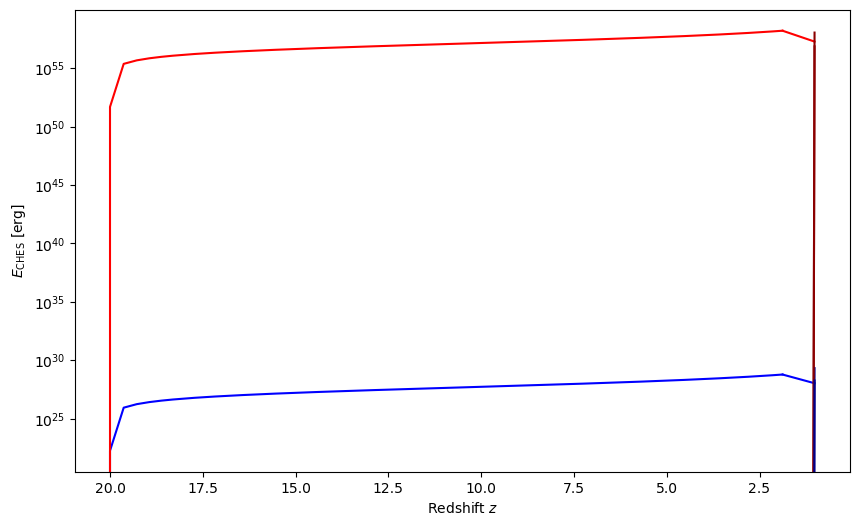

In [20]:
# --- Preparación de variables para graficar ---
time_period_2_yr = delta_t_local
time_period_2_Gyr = time_period_2_yr / 1e9
time_period_2_seconds = (((time_period_2_yr * 1e9) * u.yr).to(u.s)).value

POPULATION_BPBH_BY_GENERATION = [N_BBH_tot, np.sum(N_coll_BPBH_dict['0G-0G'])]
EMISSION_GW_OF_BPBH = [
    E_dot_BBH_shell_tot,
    np.sum(E_dot_BBH_dict['0G-0G'])
]
NUMBER_OF_CHES_BY_GENERATION = [N_CHES_tot, np.sum(N_coll_CHES_dict['0G-0G'])]
EMISSION_GW_OF_CHES = [
    E_dot_CHES_shell_tot,
    np.sum(E_dot_CHES_dict['0G-0G'])
]
PERIOD_OF_EVOLUTION_GYR = [time_period_1_Gyr, time_period_2_Gyr]

t_2nd_gyr = ((((time_period_1_Gyr + time_period_2_Gyr) * u.Gyr).to(u.yr)).value + time_z_20) / 1e9
redshift_evaluated_1 = z_at_value(cosmo.age, t_2nd_gyr * u.Gyr, zmax=25).value
Z_PERIOD_tot = [redshift_evaluated_0[-1], redshift_evaluated_1]

POPULATION_BPBH_0G1G = [0, np.sum(N_coll_BPBH_dict['0G-1G'])]
EMISSION_GW_BPBH_0G1G = [0, np.sum(E_dot_BBH_dict['0G-1G'])]
NUMBER_OF_CHES_0G1G = [0, np.sum(N_coll_CHES_dict['0G-1G'])]
EMISSION_GW_CHES_0G1G = [0, np.sum(E_dot_CHES_dict['0G-1G'])]

POPULATION_BPBH_1G1G = [0, np.sum(N_coll_BPBH_dict['1G-1G'])]
EMISSION_GW_BPBH_1G1G = [0, np.sum(E_dot_BBH_dict['1G-1G'])]
NUMBER_OF_CHES_1G1G = [0, np.sum(N_coll_CHES_dict['1G-1G'])]
EMISSION_GW_CHES_1G1G = [0, np.sum(E_dot_CHES_dict['1G-1G'])]

# --- Graficado ---
plt.figure(figsize=(10, 6))

# Periodo inicial
plt.plot(redshift_evaluated_0, E_dot_CHES_0, color='blue')
plt.plot(redshift_evaluated_0, E_dot_BBH_0, color='red')

# Corte entre periodos
plt.plot(Z_PERIOD_tot, EMISSION_GW_OF_CHES, color='blue')
plt.plot(Z_PERIOD_tot, EMISSION_GW_OF_BPBH, color='red')

# Segunda generación
plt.plot(Z_PERIOD_tot, EMISSION_GW_BPBH_0G1G, color='darkred')
plt.plot(Z_PERIOD_tot, EMISSION_GW_CHES_0G1G, color='darkblue')
plt.plot(Z_PERIOD_tot, EMISSION_GW_BPBH_1G1G, color='darkred')
plt.plot(Z_PERIOD_tot, EMISSION_GW_CHES_1G1G, color='darkblue')

# Ajustes de eje
plt.gca().invert_xaxis()
#plt.xlim([1.2, 0])
#plt.ylim([1e31, 1e33])
plt.xlabel('Redshift $z$')
plt.ylabel(r'${E}_{\mathrm{CHES}}$ [erg]')
plt.yscale('log')  # Descomentar si quieres escala logarítmica
plt.show()


In [21]:
# =============================
# --- Preparación Tercera Generación ---
# =============================

# Masas por generación previa
M_0G = M_PBH_0G  # masa original
M_1G = resultados_discretos[0]['Mass_final']  # 0G–0G → 1G
M_2G_a = resultados_discretos[1]['Mass_final']  # 0G–1G → 2G_a
M_2G_b = resultados_discretos[2]['Mass_final']  # 1G–1G → 2G_b

# Número de PBHs fusionados en segunda generación
N_2G_a = resultados_discretos[1]['N_collisions_BBH']/2
N_2G_b = resultados_discretos[2]['N_collisions_BBH']/2

# Número de PBHs después de segunda generación
N_0G_second = N_0G - (resultados_discretos[0]['N_collisions_BBH'] + N_2G_a)
N_1G_second = N_1G - (resultados_discretos[1]['N_collisions_BBH']/2 + 
              resultados_discretos[2]['N_collisions_BBH']) + resultados_discretos[0]['N_collisions_BBH']

# Masa total del cúmulo tras segunda generación
M_DM_c_2G = (
    np.sum(N_0G_second) * M_0G
    + np.sum(N_1G_second) * M_1G
    + np.sum(N_2G_a) * M_2G_a
    + np.sum(N_2G_b) * M_2G_b
)

# Masa perdida en GWs
M_LOST_GW_2G = 1e5 - M_DM_c_2G
percent_lost_GW_2G = (M_LOST_GW_2G / M_DM_cluster) * 100

# --- Mostrar resultados ---
print(f"Number of PBHs of initial generation: {np.sum(N_0G_second)} of {M_0G:.2f} Solar Mass")
print(f"Number of BHs of 1st generation:     {np.sum(N_1G_second)} of {M_1G:.2f} Solar Mass")
print(f"Number of BHs of 2nd generation_a:   {np.sum(N_2G_a)} of {M_2G_a:.2f} Solar Mass")
print(f"Number of BHs of 2nd generation_b:   {np.sum(N_2G_b)} of {M_2G_b:.2f} Solar Mass")
print(f"Cluster Mass after 2nd generation:    {M_DM_c_2G:.4e} Solar Mass")
print(f"Mass lost by GWs (BPBH mergers):       {M_LOST_GW_2G:.4e} Solar Mass")
print(f"Percentage of Cluster Mass Lost by GWs: {percent_lost_GW_2G:.1f}%")

Number of PBHs of initial generation: 4.860802648221869e+18 of 0.00 Solar Mass
Number of BHs of 1st generation:     8.658207161130186e+17 of 0.00 Solar Mass
Number of BHs of 2nd generation_a:   1.2363679009468948e+18 of 0.00 Solar Mass
Number of BHs of 2nd generation_b:   4.670968611939327e+16 of 0.00 Solar Mass
Cluster Mass after 2nd generation:    9.6100e+04 Solar Mass
Mass lost by GWs (BPBH mergers):       3.9004e+03 Solar Mass
Percentage of Cluster Mass Lost by GWs: 4.1%


In [22]:
# ==================================================
# --- Evaluación de tercera generación (dinámica) ---
# ==================================================

M_DM_cluster = M_DM_c_2G

# Inventario inicial de la tercera generación
POBLACION_3G = {
    "0G":   N_0G_second.copy(),
    "1G":   N_1G_second.copy(),
    "2G_a": N_2G_a.copy(),
    "2G_b": N_2G_b.copy(),
}

MASAS_3G = {
    "0G":   M_0G,
    "1G":   M_1G,
    "2G_a": M_2G_a,
    "2G_b": M_2G_b,
}

# Diccionarios de resultados
resultados_discretos_3rd = []
E_dot_BBH_dict_3 = {}
E_dot_CHES_dict_3 = {}
M_dict_3 = {}
N_coll_BPBH_dict_3 = {}
N_coll_CHES_dict_3 = {}

# Evaluación dinámica
for nombre_i, nombre_j in combinations_with_replacement(list(POBLACION_3G.keys()), 2):

    # === Poblaciones actuales ===
    if nombre_i == nombre_j:
        # misma especie → dividir entre 2
        N_i_array = np.round(POBLACION_3G[nombre_i] * 0.5)
        N_j_array = np.round(POBLACION_3G[nombre_j] * 0.5)
    else:
        # especies distintas → usar completas
        N_i_array = POBLACION_3G[nombre_i].copy()
        N_j_array = POBLACION_3G[nombre_j].copy()

    M_i = MASAS_3G[nombre_i]
    M_j = MASAS_3G[nombre_j]

    print(f"\nEvaluando interacción {nombre_i}-{nombre_j}...")
    print(N_i_array, N_j_array)

    if np.sum(N_i_array) == 0 or np.sum(N_j_array) == 0:
        print(f"Saltando {nombre_i}-{nombre_j} (sin PBHs en al menos una especie)")
        continue

    # --- Velocidades ---
    if M_i == M_j:
        v_mean_values = np.array([
            mean_square_velocity(r, M_DM_cluster, np.sum(N_i_array)*2, M_i)
            for r in r_values_pc
        ])
        v_i_array = v_mean_values * km_to_pc
        v_j_array = v_i_array.copy()
        v_0_local = np.mean(v_mean_values) * km_to_pc
    else:
        v_i_array = np.array([
            mean_square_velocity(r, M_DM_cluster, np.sum(N_i_array), M_i) * km_to_pc
            for r in r_values_pc
        ])
        v_j_array = np.array([
            mean_square_velocity(r, M_DM_cluster, np.sum(N_j_array), M_j) * km_to_pc
            for r in r_values_pc
        ])
        v_0_local = None

    # --- Secciones eficaces ---
    sigma_B = np.array([
        sigma_BPBH(M_i, M_j, v_i_array[j]/km_to_pc, v_j_array[j]/km_to_pc)
        if v_0_local is None else
        sigma_BPBH(M_i, M_j, v_0_local/km_to_pc, v_0_local/km_to_pc)
        for j in range(len(r_values_pc))
    ])
    sigma_C = np.array([
        sigma_CHES(M_i, M_j, v_i_array[j]/km_to_pc, v_j_array[j]/km_to_pc)
        if v_0_local is None else
        sigma_CHES(M_i, M_j, v_0_local/km_to_pc, v_0_local/km_to_pc)
        for j in range(len(r_values_pc))
    ])

    # --- Integral I y tasas ---
    I_vals = np.array([
        I_rj(r_values_pc[j], np.sum(N_i_array), M_i, np.sum(N_j_array), M_j, M_DM_cluster)
        for j in range(len(r_values_pc))
    ])
    coeffs_ij = np.polyfit(r_values_pc, I_vals, 3)

    Gamma_values_yr = np.array([
        ((np.abs(v_i_array[j] - v_j_array[j]))**(18/7) if v_0_local is None else (v_0_local)**(18/7))
        * (14 * np.pi / 3) * sigma_B[j] * (n_pbh(r_values_pc[j], M_j) / v_j_array[j])
        * np.polyval(coeffs_ij, r_values_pc[j]) * seconds_per_year
        for j in range(len(r_values_pc))
    ])
    Gamma_CHES_yr = np.array([
        ((np.abs(v_i_array[j] - v_j_array[j]))**(18/7) if v_0_local is None else (v_0_local)**(18/7))
        * (14 * np.pi / 3) * sigma_C[j] * (n_pbh(r_values_pc[j], M_j) / v_j_array[j])
        * np.polyval(coeffs_ij, r_values_pc[j]) * seconds_per_year
        for j in range(len(r_values_pc))
    ])

    # --- Colisiones ---
    delta_t_local = 3.3e9
    Prob_form = Gamma_values_yr * delta_t_local
    N_coll_BBH = np.where(Prob_form * N_i_array > 0.95,
                          np.round(Prob_form * N_i_array), 0.0)

    # --- Ajuste: no exceder poblaciones disponibles ---
    if nombre_i == nombre_j:
        # Misma especie: cada fusión consume 2 PBHs
        max_fusions = np.floor(np.sum(N_i_array) / 2)
        if np.sum(N_coll_BBH) > max_fusions:
            factor = max_fusions / np.sum(N_coll_BBH) if np.sum(N_coll_BBH) > 0 else 0
            N_coll_BBH = np.floor(N_coll_BBH * factor)
    else:
        # Distintas especies: cada fusión consume 1 de cada especie
        max_fusions = min(np.sum(N_i_array), np.sum(N_j_array))
        if np.sum(N_coll_BBH) > max_fusions:
            factor = max_fusions / np.sum(N_coll_BBH) if np.sum(N_coll_BBH) > 0 else 0
            N_coll_BBH = np.floor(N_coll_BBH * factor)

    # Energía y masas finales
    E_BBH_event = E_rad_GW(M_i, M_j)
    E_dot_BBH = N_coll_BBH * E_BBH_event
    M_result = final_mass_GW(M_i, M_j)

    # CHEs
    Prob_emit = Gamma_CHES_yr * delta_t_local
    N_coll_CHES = np.round(Prob_emit * N_i_array)
    E_CHES_event = E_rad_CHES(M_i, M_j)
    E_dot_CHES = N_coll_CHES * E_CHES_event
    
    # --- Impresión de resultados ---
    print(f"Masses interacting")
    print(f"M_PBH_{nombre_i}: {M_i:.2f}")
    print(f"M_PBH_{nombre_j}: {M_j:.2f}")
    print(f"Mass_final_from_{nombre_i}-{nombre_j}: {M_result:.2f}")
    print(f"\n{'r_j (pc)':<10}{'Γ_BBH (yr^-1)':<15}{'Γ_CHES (yr^-1)':<17}"
          f"{'T_1st merge (Gyr)':<20}{'N_BBH':<10}{'N_CHES':<10}")
    print("=" * 80)
    for i in range(len(r_values_pc)):
        t_merge = (1/Gamma_values_yr[i])/1e9 if Gamma_values_yr[i] > 0 else float('inf')
        print(f"{r_values_pc[i]:<10.2f}"
              f"{Gamma_values_yr[i]:<15.3e}"
              f"{Gamma_CHES_yr[i]:<17.3e}"
              f"{t_merge:<20.3e}"
              f"{N_coll_BBH[i]:<10.1f}"
              f"{N_coll_CHES[i]:.1f}")
    
    print(f"\n[Resumen {nombre_i}-{nombre_j}]")
    print(f"Total BBH events = {int(np.sum(N_coll_BBH))}")
    print(f"Total CHES events = {int(np.sum(N_coll_CHES))}")
    print(f"P_BBH radiated = {np.sum(E_dot_BBH):.2e} erg")
    print(f"P_CHES radiated = {np.sum(E_dot_CHES):.2e} erg")
    
    # --- Guardar resultados ---
    resultados_discretos_3rd.append({
        "interaccion": f"{nombre_i}-{nombre_j}",
        "Mass_final": M_result,
        "N_collisions_BBH": N_coll_BBH,
        "N_collisions_CHES": N_coll_CHES
    })

    N_coll_BPBH_dict_3[f"{nombre_i}-{nombre_j}"] = N_coll_BBH
    N_coll_CHES_dict_3[f"{nombre_i}-{nombre_j}"] = N_coll_CHES
    E_dot_BBH_dict_3[f"{nombre_i}-{nombre_j}"] = E_dot_BBH
    E_dot_CHES_dict_3[f"{nombre_i}-{nombre_j}"] = E_dot_CHES
    M_dict_3[f"{nombre_i}-{nombre_j}"] = M_result

    # === Actualización del inventario tras la interacción ===
    if nombre_i == "0G" and nombre_j == "0G":
        POBLACION_3G["0G"] -= N_coll_BBH
        POBLACION_3G["1G"] += N_coll_BBH / 2

    elif {nombre_i, nombre_j} == {"0G", "1G"}:
        POBLACION_3G["0G"] -= N_coll_BBH / 2
        POBLACION_3G["1G"] -= N_coll_BBH / 2
        POBLACION_3G["2G_a"] += N_coll_BBH / 2

    elif nombre_i == "1G" and nombre_j == "1G":
        POBLACION_3G["1G"] -= N_coll_BBH
        POBLACION_3G["2G_b"] += N_coll_BBH / 2

    elif {nombre_i, nombre_j} == {"0G", "2G_a"}:
        POBLACION_3G["0G"] -= N_coll_BBH / 2
        POBLACION_3G["2G_a"] -= N_coll_BBH / 2
        POBLACION_3G["3G_a"] = POBLACION_3G.get("3G_a", 0) + N_coll_BBH / 2

    elif {nombre_i, nombre_j} == {"0G", "2G_b"}:
        POBLACION_3G["0G"] -= N_coll_BBH / 2
        POBLACION_3G["2G_b"] -= N_coll_BBH / 2
        POBLACION_3G["3G_c"] = POBLACION_3G.get("3G_c", 0) + N_coll_BBH / 2

    elif {nombre_i, nombre_j} == {"1G", "2G_a"}:
        POBLACION_3G["1G"] -= N_coll_BBH / 2
        POBLACION_3G["2G_a"] -= N_coll_BBH / 2
        POBLACION_3G["3G_b"] = POBLACION_3G.get("3G_b", 0) + N_coll_BBH / 2

    elif {nombre_i, nombre_j} == {"1G", "2G_b"}:
        POBLACION_3G["1G"] -= N_coll_BBH / 2
        POBLACION_3G["2G_b"] -= N_coll_BBH / 2
        POBLACION_3G["3G_e"] = POBLACION_3G.get("3G_e", 0) + N_coll_BBH / 2

    elif nombre_i == "2G_a" and nombre_j == "2G_a":
        POBLACION_3G["2G_a"] -= N_coll_BBH
        POBLACION_3G["3G_d"] = POBLACION_3G.get("3G_d", 0) + N_coll_BBH / 2

    elif {nombre_i, nombre_j} == {"2G_a", "2G_b"}:
        POBLACION_3G["2G_a"] -= N_coll_BBH / 2
        POBLACION_3G["2G_b"] -= N_coll_BBH / 2
        POBLACION_3G["3G_f"] = POBLACION_3G.get("3G_f", 0) + N_coll_BBH / 2

    elif nombre_i == "2G_b" and nombre_j == "2G_b":
        POBLACION_3G["2G_b"] -= N_coll_BBH
        POBLACION_3G["3G_g"] = POBLACION_3G.get("3G_g", 0) + N_coll_BBH / 2

    # Evitar negativos
    for especie in POBLACION_3G:
        POBLACION_3G[especie] = np.clip(POBLACION_3G[especie], 0, None)

    # Mostrar inventario actualizado y masa total
    M_DM_c_3G = sum(
        np.sum(POBLACION_3G[sp]) * MASAS_3G.get(sp, M_dict_3.get(sp, 0))
        for sp in POBLACION_3G
    )
    print(f"\n[Inventario tras {nombre_i}-{nombre_j}]:")
    for especie, arr in POBLACION_3G.items():
        print(f"  {especie}: {int(np.sum(arr))} PBHs")
    print(f"  >>> Masa total actual del cúmulo: {M_DM_c_3G:.4e} M_sun")

# === Guardar masa final de la 3ª generación ===
M_DM_c_3G_final = M_DM_c_3G
print(f"\n=== Masa total FINAL tras la 3ª generación: {M_DM_c_3G_final:.4e} M_sun ===")




Evaluando interacción 0G-0G...
[2.84598822e+17 2.96378588e+17 3.00424957e+17 3.03105414e+17
 2.69512566e+17 2.57036231e+17 2.27815278e+17 1.96127730e+17
 1.62150668e+17 1.33251070e+17] [2.84598822e+17 2.96378588e+17 3.00424957e+17 3.03105414e+17
 2.69512566e+17 2.57036231e+17 2.27815278e+17 1.96127730e+17
 1.62150668e+17 1.33251070e+17]
Masses interacting
M_PBH_0G: 0.00
M_PBH_0G: 0.00
Mass_final_from_0G-0G: 0.00

r_j (pc)  Γ_BBH (yr^-1)  Γ_CHES (yr^-1)   T_1st merge (Gyr)   N_BBH     N_CHES    
0.10      7.068e-11      3.119e-10        1.415e+01           66379555985880880.0292950056613861056.0
0.21      6.637e-11      2.929e-10        1.507e+01           64910407968288616.0286466328475948640.0
0.32      5.982e-11      2.640e-10        1.672e+01           59304168171019256.0261724550053232576.0
0.43      5.204e-11      2.296e-10        1.922e+01           52048801511851768.0229704750553375584.0
0.54      4.397e-11      1.941e-10        2.274e+01           39107143892616200.01725898862

Masses interacting
M_PBH_1G: 0.00
M_PBH_2G_a: 0.00
Mass_final_from_1G-2G_a: 0.00

r_j (pc)  Γ_BBH (yr^-1)  Γ_CHES (yr^-1)   T_1st merge (Gyr)   N_BBH     N_CHES    
0.10      4.673e-10      5.093e-09        2.140e+00           179619875641595040.02617014016411269632.0
0.21      4.410e-10      4.855e-09        2.268e+00           139504792930692144.02052955206658146816.0
0.32      4.007e-10      4.485e-09        2.495e+00           88971321159807840.01331073446560654336.0
0.43      3.525e-10      4.033e-09        2.837e+00           49966345128392976.0764254218715546880.0
0.54      3.019e-10      3.548e-09        3.312e+00           23008694033749312.0361461251244967744.0
0.65      2.534e-10      3.070e-09        3.946e+00           11134931087160656.0180305947624003712.0
0.76      2.096e-10      2.624e-09        4.771e+00           5165347679207041.086435073575531344.0
0.88      1.717e-10      2.225e-09        5.824e+00           2497767712290056.043266588715640960.0
0.99      1.399e-1

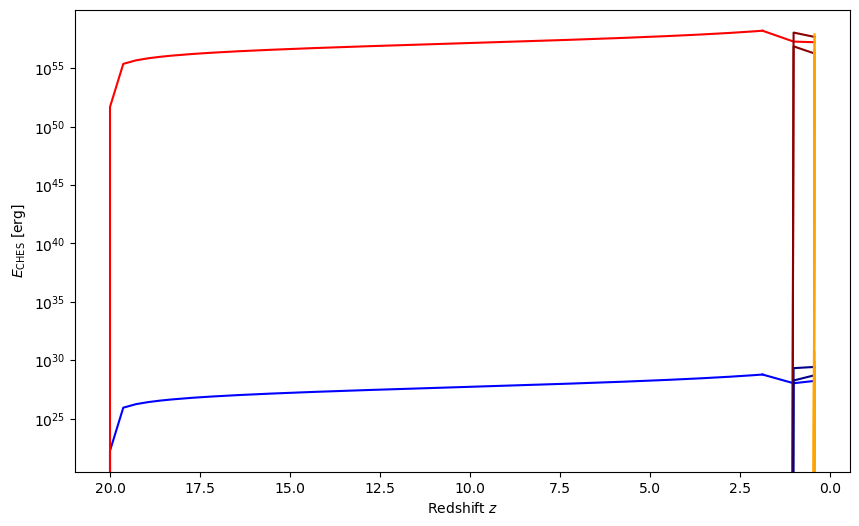

In [23]:
# --- Preparación de variables para graficar (3ª generación) ---
time_period_3_yr = delta_t_local
time_period_3_Gyr = time_period_3_yr / 1e9

POPULATION_BPBH_BY_GENERATION = [
    N_BBH_tot,
    np.sum(N_coll_BPBH_dict.get('0G-0G', 0)),
    np.sum(N_coll_BPBH_dict_3.get('0G-0G', 0))
]
EMISSION_GW_OF_BPBH = [
    E_dot_BBH_shell_tot,
    np.sum(E_dot_BBH_dict.get('0G-0G', 0)),
    np.sum(E_dot_BBH_dict_3.get('0G-0G', 0))
]

NUMBER_OF_CHES_BY_GENERATION = [
    N_CHES_tot,
    np.sum(N_coll_CHES_dict.get('0G-0G', 0)),
    np.sum(N_coll_CHES_dict_3.get('0G-0G', 0))
]
EMISSION_GW_OF_CHES = [
    E_dot_CHES_shell_tot,
    np.sum(E_dot_CHES_dict.get('0G-0G', 0)),
    np.sum(E_dot_CHES_dict_3.get('0G-0G', 0))
]

PERIOD_OF_EVOLUTION_GYR = [
    time_period_1_Gyr,
    time_period_2_Gyr,
    time_period_3_Gyr
]

# --- Redshift del final de la 3ª generación ---
t_3rd_gyr = (
    (((time_period_1_Gyr + time_period_2_Gyr + time_period_3_Gyr) * u.Gyr).to(u.yr)).value
    + time_z_20
) / 1e9
redshift_evaluated_2 = z_at_value(cosmo.age, t_3rd_gyr * u.Gyr, zmax=25).value
Z_PERIOD_tot = [
    redshift_evaluated_0[-1],
    redshift_evaluated_1,
    redshift_evaluated_2
]

# --- Combinaciones de la tercera generación ---
# Segunda generación
POPULATION_BPBH_0G1G = [0, np.sum(N_coll_BPBH_dict.get('0G-1G', 0)), np.sum(N_coll_BPBH_dict_3.get('0G-1G', 0))]
EMISSION_GW_BPBH_0G1G = [0, np.sum(E_dot_BBH_dict.get('0G-1G', 0)), np.sum(E_dot_BBH_dict_3.get('0G-1G', 0))]
NUMBER_OF_CHES_0G1G   = [0, np.sum(N_coll_CHES_dict.get('0G-1G', 0)), np.sum(N_coll_CHES_dict_3.get('0G-1G', 0))]
EMISSION_GW_CHES_0G1G = [0, np.sum(E_dot_CHES_dict.get('0G-1G', 0)), np.sum(E_dot_CHES_dict_3.get('0G-1G', 0))]

POPULATION_BPBH_1G1G = [0, np.sum(N_coll_BPBH_dict.get('1G-1G', 0)), np.sum(N_coll_BPBH_dict_3.get('1G-1G', 0))]
EMISSION_GW_BPBH_1G1G = [0, np.sum(E_dot_BBH_dict.get('1G-1G', 0)), np.sum(E_dot_BBH_dict_3.get('1G-1G', 0))]
NUMBER_OF_CHES_1G1G   = [0, np.sum(N_coll_CHES_dict.get('1G-1G', 0)), np.sum(N_coll_CHES_dict_3.get('1G-1G', 0))]
EMISSION_GW_CHES_1G1G = [0, np.sum(E_dot_CHES_dict.get('1G-1G', 0)), np.sum(E_dot_CHES_dict_3.get('1G-1G', 0))]

# Tercera generación (todas las combinaciones que viste en resultados_discretos_3rd)
POPULATION_BPBH_0G2G_a = [0, 0, np.sum(N_coll_BPBH_dict_3.get('0G-2G_a', 0))]
EMISSION_GW_BPBH_0G2G_a = [0, 0, np.sum(E_dot_BBH_dict_3.get('0G-2G_a', 0))]
NUMBER_OF_CHES_0G2G_a   = [0, 0, np.sum(N_coll_CHES_dict_3.get('0G-2G_a', 0))]
EMISSION_GW_CHES_0G2G_a = [0, 0, np.sum(E_dot_CHES_dict_3.get('0G-2G_a', 0))]

POPULATION_BPBH_0G2G_b = [0, 0, np.sum(N_coll_BPBH_dict_3.get('0G-2G_b', 0))]
EMISSION_GW_BPBH_0G2G_b = [0, 0, np.sum(E_dot_BBH_dict_3.get('0G-2G_b', 0))]
NUMBER_OF_CHES_0G2G_b   = [0, 0, np.sum(N_coll_CHES_dict_3.get('0G-2G_b', 0))]
EMISSION_GW_CHES_0G2G_b = [0, 0, np.sum(E_dot_CHES_dict_3.get('0G-2G_b', 0))]

POPULATION_BPBH_1G2G_a = [0, 0, np.sum(N_coll_BPBH_dict_3.get('1G-2G_a', 0))]
EMISSION_GW_BPBH_1G2G_a = [0, 0, np.sum(E_dot_BBH_dict_3.get('1G-2G_a', 0))]
NUMBER_OF_CHES_1G2G_a   = [0, 0, np.sum(N_coll_CHES_dict_3.get('1G-2G_a', 0))]
EMISSION_GW_CHES_1G2G_a = [0, 0, np.sum(E_dot_CHES_dict_3.get('1G-2G_a', 0))]

POPULATION_BPBH_1G2G_b = [0, 0, np.sum(N_coll_BPBH_dict_3.get('1G-2G_b', 0))]
EMISSION_GW_BPBH_1G2G_b = [0, 0, np.sum(E_dot_BBH_dict_3.get('1G-2G_b', 0))]
NUMBER_OF_CHES_1G2G_b   = [0, 0, np.sum(N_coll_CHES_dict_3.get('1G-2G_b', 0))]
EMISSION_GW_CHES_1G2G_b = [0, 0, np.sum(E_dot_CHES_dict_3.get('1G-2G_b', 0))]

POPULATION_BPBH_2G_a2G_a = [0, 0, np.sum(N_coll_BPBH_dict_3.get('2G_a-2G_a', 0))]
EMISSION_GW_BPBH_2G_a2G_a = [0, 0, np.sum(E_dot_BBH_dict_3.get('2G_a-2G_a', 0))]
NUMBER_OF_CHES_2G_a2G_a   = [0, 0, np.sum(N_coll_CHES_dict_3.get('2G_a-2G_a', 0))]
EMISSION_GW_CHES_2G_a2G_a = [0, 0, np.sum(E_dot_CHES_dict_3.get('2G_a-2G_a', 0))]

POPULATION_BPBH_2G_a2G_b = [0, 0, np.sum(N_coll_BPBH_dict_3.get('2G_a-2G_b', 0))]
EMISSION_GW_BPBH_2G_a2G_b = [0, 0, np.sum(E_dot_BBH_dict_3.get('2G_a-2G_b', 0))]
NUMBER_OF_CHES_2G_a2G_b   = [0, 0, np.sum(N_coll_CHES_dict_3.get('2G_a-2G_b', 0))]
EMISSION_GW_CHES_2G_a2G_b = [0, 0, np.sum(E_dot_CHES_dict_3.get('2G_a-2G_b', 0))]

POPULATION_BPBH_2G_b2G_b = [0, 0, np.sum(N_coll_BPBH_dict_3.get('2G_b-2G_b', 0))]
EMISSION_GW_BPBH_2G_b2G_b = [0, 0, np.sum(E_dot_BBH_dict_3.get('2G_b-2G_b', 0))]
NUMBER_OF_CHES_2G_b2G_b   = [0, 0, np.sum(N_coll_CHES_dict_3.get('2G_b-2G_b', 0))]
EMISSION_GW_CHES_2G_b2G_b = [0, 0, np.sum(E_dot_CHES_dict_3.get('2G_b-2G_b', 0))]

# --- Graficado ---
plt.figure(figsize=(10, 6))

# Periodo inicial
plt.plot(redshift_evaluated_0, E_dot_CHES_0, color='blue')
plt.plot(redshift_evaluated_0, E_dot_BBH_0, color='red')

# Corte entre periodos
plt.plot(Z_PERIOD_tot, EMISSION_GW_OF_CHES, color='blue')
plt.plot(Z_PERIOD_tot, EMISSION_GW_OF_BPBH, color='red')

# Segunda generación
plt.plot(Z_PERIOD_tot, EMISSION_GW_BPBH_0G1G, color='darkred')
plt.plot(Z_PERIOD_tot, EMISSION_GW_CHES_0G1G, color='darkblue')
plt.plot(Z_PERIOD_tot, EMISSION_GW_BPBH_1G1G, color='darkred')
plt.plot(Z_PERIOD_tot, EMISSION_GW_CHES_1G1G, color='darkblue')

# Tercera generación
plt.plot(Z_PERIOD_tot, EMISSION_GW_BPBH_0G2G_a, color='orange')
plt.plot(Z_PERIOD_tot, EMISSION_GW_CHES_0G2G_a, color='orange')
plt.plot(Z_PERIOD_tot, EMISSION_GW_BPBH_0G2G_b, color='orange')
plt.plot(Z_PERIOD_tot, EMISSION_GW_CHES_0G2G_b, color='orange')
plt.plot(Z_PERIOD_tot, EMISSION_GW_BPBH_1G2G_a, color='orange')
plt.plot(Z_PERIOD_tot, EMISSION_GW_CHES_1G2G_a, color='orange')
plt.plot(Z_PERIOD_tot, EMISSION_GW_BPBH_1G2G_b, color='orange')
plt.plot(Z_PERIOD_tot, EMISSION_GW_CHES_1G2G_b, color='orange')
plt.plot(Z_PERIOD_tot, EMISSION_GW_BPBH_2G_a2G_a, color='orange')
plt.plot(Z_PERIOD_tot, EMISSION_GW_CHES_2G_a2G_a, color='orange')
plt.plot(Z_PERIOD_tot, EMISSION_GW_BPBH_2G_a2G_b, color='orange')
plt.plot(Z_PERIOD_tot, EMISSION_GW_CHES_2G_a2G_b, color='orange')
plt.plot(Z_PERIOD_tot, EMISSION_GW_BPBH_2G_b2G_b, color='orange')
plt.plot(Z_PERIOD_tot, EMISSION_GW_CHES_2G_b2G_b, color='orange')

# Ajustes de eje
plt.gca().invert_xaxis()
plt.xlabel('Redshift $z$')
plt.ylabel(r'${E}_{\mathrm{CHES}}$ [erg]')
plt.yscale('log')
plt.show()


In [24]:
# =============================
# --- Preparación Cuarta Generación ---
# =============================

# Masas heredadas de generaciones previas
M_0G   = MASAS_3G["0G"]
M_1G   = MASAS_3G["1G"]
M_2G_a = MASAS_3G["2G_a"]
M_2G_b = MASAS_3G["2G_b"]

# Masas de las nuevas especies formadas en 3G (usando resultados_discretos_3rd)
M_3G = {}
for r in resultados_discretos_3rd:
    inter = r["interaccion"]
    if inter.startswith("0G-2G_a"):
        M_3G["3G_a"] = r["Mass_final"]
    elif inter.startswith("1G-2G_a"):
        M_3G["3G_b"] = r["Mass_final"]
    elif inter.startswith("0G-2G_b"):
        M_3G["3G_c"] = r["Mass_final"]
    elif inter.startswith("2G_a-2G_a"):
        M_3G["3G_d"] = r["Mass_final"]
    elif inter.startswith("1G-2G_b"):
        M_3G["3G_e"] = r["Mass_final"]
    elif inter.startswith("2G_a-2G_b"):
        M_3G["3G_f"] = r["Mass_final"]
    elif inter.startswith("2G_b-2G_b"):
        M_3G["3G_g"] = r["Mass_final"]

# Poblaciones sobrevivientes de 3G (alimentan 4G)
N_0G_third   = np.round(POBLACION_3G.get("0G", 0))
N_1G_third   = np.round(POBLACION_3G.get("1G", 0))
N_2G_a_third = np.round(POBLACION_3G.get("2G_a", 0))
N_2G_b_third = np.round(POBLACION_3G.get("2G_b", 0))

# Poblaciones de nuevas especies en 3G
N_3G = {k: np.round(POBLACION_3G.get(k, 0)) for k in ["3G_a", "3G_b", "3G_c", "3G_d", "3G_e", "3G_f", "3G_g"]}

# Masa total del cúmulo tras 3G
M_DM_c_3G = (
    np.sum(N_0G_third)   * M_0G +
    np.sum(N_1G_third)   * M_1G +
    np.sum(N_2G_a_third) * M_2G_a +
    np.sum(N_2G_b_third) * M_2G_b +
    sum(np.sum(N_3G[k]) * M_3G[k] for k in N_3G if k in M_3G)
)

# Masa perdida por GWs en 3G
M_LOST_GW_3G = M_DM_c_2G - M_DM_c_3G
percent_lost_GW_3G = (M_LOST_GW_3G / M_DM_c_2G) * 100

# --- Mostrar inventario previo ---
print(f"Number of PBHs of initial generation: {np.sum(N_0G_third)} of {M_0G:.6f} Solar Mass")
print(f"Number of BHs of 1st generation:     {np.sum(N_1G_third)} of {M_1G:.6f} Solar Mass")
print(f"Number of BHs of 2nd generation_a:   {np.sum(N_2G_a_third)} of {M_2G_a:.6f} Solar Mass")
print(f"Number of BHs of 2nd generation_b:   {np.sum(N_2G_b_third)} of {M_2G_b:.6f} Solar Mass")
for k in sorted(N_3G.keys()):
    if k in M_3G:
        print(f"Number of BHs of {k}: {np.sum(N_3G[k])} of {M_3G[k]:.6f} Solar Mass")

print(f"Cluster Mass after 3rd generation:    {M_DM_c_3G:.4e} Solar Mass")
print(f"Mass lost by GWs (BPBH mergers):      {M_LOST_GW_3G:.4e} Solar Mass")
print(f"Percentage of Cluster Mass Lost by GWs: {percent_lost_GW_3G:.1f}%")

Number of PBHs of initial generation: 3.065310580858543e+18 of 0.000000 Solar Mass
Number of BHs of 1st generation:     2.3200004693266538e+17 of 0.000000 Solar Mass
Number of BHs of 2nd generation_a:   5.857875964926766e+17 of 0.000000 Solar Mass
Number of BHs of 2nd generation_b:   1.1214933602113476e+16 of 0.000000 Solar Mass
Number of BHs of 3G_a: 8.805107419331039e+17 of 0.000000 Solar Mass
Number of BHs of 3G_b: 2.509020309911753e+17 of 0.000000 Solar Mass
Number of BHs of 3G_c: 2.3354843059696636e+16 of 0.000000 Solar Mass
Number of BHs of 3G_d: 1.6993961918297948e+16 of 0.000000 Solar Mass
Number of BHs of 3G_e: 1.890198405850979e+16 of 0.000000 Solar Mass
Number of BHs of 3G_f: 9833190612655746.0 of 0.000000 Solar Mass
Number of BHs of 3G_g: 53481143815243.0 of 0.000000 Solar Mass
Cluster Mass after 3rd generation:    9.0833e+04 Solar Mass
Mass lost by GWs (BPBH mergers):      5.2668e+03 Solar Mass
Percentage of Cluster Mass Lost by GWs: 5.5%


In [25]:
# ==================================================
# --- Evaluación de cuarta generación (dinámica) ---
# ==================================================

M_DM_cluster = M_DM_c_3G

# Inventario inicial de la cuarta generación
POBLACION_4G = {
    "0G":   N_0G_third.copy(),
    "1G":   N_1G_third.copy(),
    "2G_a": N_2G_a_third.copy(),
    "2G_b": N_2G_b_third.copy(),
    "3G_a": N_3G.get("3G_a", 0).copy(),
    "3G_b": N_3G.get("3G_b", 0).copy(),
    "3G_c": N_3G.get("3G_c", 0).copy(),
    "3G_d": N_3G.get("3G_d", 0).copy(),
    "3G_e": N_3G.get("3G_e", 0).copy(),
    "3G_f": N_3G.get("3G_f", 0).copy(),
    "3G_g": N_3G.get("3G_g", 0).copy(),
}

MASAS_4G = {**MASAS_3G, **M_3G}

# Diccionarios de resultados
resultados_discretos_4th = []
E_dot_BBH_dict_4 = {}
E_dot_CHES_dict_4 = {}
M_dict_4 = {}
N_coll_BPBH_dict_4 = {}
N_coll_CHES_dict_4 = {}

# ==========================================
# --- Velocidades iniciales antes de 4G ---
# ==========================================

print("\n=== Velocidades iniciales antes de la 4ª generación ===")
M_DM_cluster = M_DM_c_3G  # masa total al inicio de 4G

for nombre in POBLACION_4G:
    if nombre not in MASAS_4G:  # evitar especies sin masa definida
        continue

    N_array = POBLACION_4G[nombre]
    if np.sum(N_array) == 0:
        print(f"Saltando {nombre} (sin PBHs en esta especie)")
        continue

    M_especie = MASAS_4G[nombre]

    # Calcular velocidades
    v_mean_values = np.array([
        mean_square_velocity(r, M_DM_cluster, np.sum(N_array), M_especie)
        for r in r_values_pc
    ])

    # Mostrar tabla
    print(f"\nEspecie: {nombre} (M = {M_especie:.2f} M_sun, N = {int(np.sum(N_array))})")
    print(f"{'r_j (pc)':<10}{'v_'+nombre+' (km/s)':<20}")
    print("=" * 40)
    for r, v in zip(r_values_pc, v_mean_values):
        print(f"{r:<10.3f}{v:<20.3e}")

# Evaluación dinámica
for nombre_i, nombre_j in combinations_with_replacement(list(POBLACION_4G.keys()), 2):

    # === Poblaciones actuales ===
    if nombre_i == nombre_j:
        N_i_array = np.round(POBLACION_4G[nombre_i] * 0.5)
        N_j_array = np.round(POBLACION_4G[nombre_j] * 0.5)
    else:
        N_i_array = POBLACION_4G[nombre_i].copy()
        N_j_array = POBLACION_4G[nombre_j].copy()

    M_i = MASAS_4G[nombre_i]
    M_j = MASAS_4G[nombre_j]

    print(f"\nEvaluando interacción {nombre_i}-{nombre_j}...")
    print(N_i_array, N_j_array)

    if np.sum(N_i_array) == 0 or np.sum(N_j_array) == 0:
        print(f"Saltando {nombre_i}-{nombre_j} (sin PBHs en al menos una especie)")
        continue

    # --- Velocidades ---
    if M_i == M_j:
        v_mean_values = np.array([
            mean_square_velocity(r, M_DM_cluster, np.sum(N_i_array)*2, M_i)
            for r in r_values_pc
        ])
        v_i_array = v_mean_values * km_to_pc
        v_j_array = v_i_array.copy()
        v_0_local = np.mean(v_mean_values) * km_to_pc
    else:
        v_i_array = np.array([
            mean_square_velocity(r, M_DM_cluster, np.sum(N_i_array), M_i) * km_to_pc
            for r in r_values_pc
        ])
        v_j_array = np.array([
            mean_square_velocity(r, M_DM_cluster, np.sum(N_j_array), M_j) * km_to_pc
            for r in r_values_pc
        ])
        v_0_local = None

    # --- Secciones eficaces ---
    sigma_B = np.array([
        sigma_BPBH(M_i, M_j, v_i_array[j]/km_to_pc, v_j_array[j]/km_to_pc)
        if v_0_local is None else
        sigma_BPBH(M_i, M_j, v_0_local/km_to_pc, v_0_local/km_to_pc)
        for j in range(len(r_values_pc))
    ])
    sigma_C = np.array([
        sigma_CHES(M_i, M_j, v_i_array[j]/km_to_pc, v_j_array[j]/km_to_pc)
        if v_0_local is None else
        sigma_CHES(M_i, M_j, v_0_local/km_to_pc, v_0_local/km_to_pc)
        for j in range(len(r_values_pc))
    ])

    # --- Integral I y tasas ---
    I_vals = np.array([
        I_rj(r_values_pc[j], np.sum(N_i_array), M_i, np.sum(N_j_array), M_j, M_DM_cluster)
        for j in range(len(r_values_pc))
    ])
    coeffs_ij = np.polyfit(r_values_pc, I_vals, 3)

    Gamma_values_yr = np.array([
        ((np.abs(v_i_array[j] - v_j_array[j]))**(18/7) if v_0_local is None else (v_0_local)**(18/7))
        * (14 * np.pi / 3) * sigma_B[j] * (n_pbh(r_values_pc[j], M_j) / v_j_array[j])
        * np.polyval(coeffs_ij, r_values_pc[j]) * seconds_per_year
        for j in range(len(r_values_pc))
    ])
    Gamma_CHES_yr = np.array([
        ((np.abs(v_i_array[j] - v_j_array[j]))**(18/7) if v_0_local is None else (v_0_local)**(18/7))
        * (14 * np.pi / 3) * sigma_C[j] * (n_pbh(r_values_pc[j], M_j) / v_j_array[j])
        * np.polyval(coeffs_ij, r_values_pc[j]) * seconds_per_year
        for j in range(len(r_values_pc))
    ])

    # --- Colisiones ---
    delta_t_local = 4.7e9
    Prob_form = Gamma_values_yr * delta_t_local
    N_coll_BBH = np.where(Prob_form * N_i_array > 0.95,
                          np.round(Prob_form * N_i_array), 0.0)

    # --- Ajuste: no exceder poblaciones disponibles ---
    if nombre_i == nombre_j:
        # Misma especie: cada fusión consume 2 PBHs
        max_fusions = np.floor(np.sum(N_i_array) / 2)
        if np.sum(N_coll_BBH) > max_fusions:
            factor = max_fusions / np.sum(N_coll_BBH) if np.sum(N_coll_BBH) > 0 else 0
            N_coll_BBH = np.floor(N_coll_BBH * factor)
    else:
        # Distintas especies: cada fusión consume 1 de cada especie
        max_fusions = min(np.sum(N_i_array), np.sum(N_j_array))
        if np.sum(N_coll_BBH) > max_fusions:
            factor = max_fusions / np.sum(N_coll_BBH) if np.sum(N_coll_BBH) > 0 else 0
            N_coll_BBH = np.floor(N_coll_BBH * factor)

    # Energía y masas finales
    E_BBH_event = E_rad_GW(M_i, M_j)
    E_dot_BBH = N_coll_BBH * E_BBH_event
    M_result = final_mass_GW(M_i, M_j)

    # CHEs
    Prob_emit = Gamma_CHES_yr * delta_t_local
    N_coll_CHES = np.round(Prob_emit * N_i_array)
    E_CHES_event = E_rad_CHES(M_i, M_j)
    E_dot_CHES = N_coll_CHES * E_CHES_event
    
    # --- Impresión de resultados ---
    print(f"Masses interacting")
    print(f"M_PBH_{nombre_i}: {M_i:.2f}")
    print(f"M_PBH_{nombre_j}: {M_j:.2f}")
    print(f"Mass_final_from_{nombre_i}-{nombre_j}: {M_result:.2f}")
    print(f"\n{'r_j (pc)':<10}{'Γ_BBH (yr^-1)':<15}{'Γ_CHES (yr^-1)':<17}"
          f"{'T_1st merge (Gyr)':<20}{'N_BBH':<10}{'N_CHES':<10}")
    print("=" * 80)
    for i in range(len(r_values_pc)):
        t_merge = (1/Gamma_values_yr[i])/1e9 if Gamma_values_yr[i] > 0 else float('inf')
        print(f"{r_values_pc[i]:<10.2f}"
              f"{Gamma_values_yr[i]:<15.3e}"
              f"{Gamma_CHES_yr[i]:<17.3e}"
              f"{t_merge:<20.3e}"
              f"{N_coll_BBH[i]:<10.1f}"
              f"{N_coll_CHES[i]:.1f}")
    
    print(f"\n[Resumen {nombre_i}-{nombre_j}]")
    print(f"Total BBH events = {int(np.sum(N_coll_BBH))}")
    print(f"Total CHES events = {int(np.sum(N_coll_CHES))}")
    print(f"P_BBH radiated = {np.sum(E_dot_BBH):.2e} erg")
    print(f"P_CHES radiated = {np.sum(E_dot_CHES):.2e} erg")
    
    # --- Guardar resultados ---
    resultados_discretos_4th.append({
        "interaccion": f"{nombre_i}-{nombre_j}",
        "Mass_final": M_result,
        "N_collisions_BBH": N_coll_BBH,
        "N_collisions_CHES": N_coll_CHES
    })

    N_coll_BPBH_dict_4[f"{nombre_i}-{nombre_j}"] = N_coll_BBH
    N_coll_CHES_dict_4[f"{nombre_i}-{nombre_j}"] = N_coll_CHES
    E_dot_BBH_dict_4[f"{nombre_i}-{nombre_j}"] = E_dot_BBH
    E_dot_CHES_dict_4[f"{nombre_i}-{nombre_j}"] = E_dot_CHES
    M_dict_4[f"{nombre_i}-{nombre_j}"] = M_result

    # === Actualización del inventario tras la interacción ===
    if nombre_i == "0G" and nombre_j == "0G":
        POBLACION_4G["0G"] -= N_coll_BBH
        POBLACION_4G["1G"] += N_coll_BBH / 2

    elif {nombre_i, nombre_j} == {"0G", "1G"}:
        POBLACION_4G["0G"] -= N_coll_BBH / 2
        POBLACION_4G["1G"] -= N_coll_BBH / 2
        POBLACION_4G["2G_a"] += N_coll_BBH / 2

    elif nombre_i == "1G" and nombre_j == "1G":
        POBLACION_4G["1G"] -= N_coll_BBH
        POBLACION_4G["2G_b"] += N_coll_BBH / 2

    elif {nombre_i, nombre_j} == {"0G", "2G_a"}:
        POBLACION_4G["0G"] -= N_coll_BBH / 2
        POBLACION_4G["2G_a"] -= N_coll_BBH / 2
        POBLACION_4G["3G_a"] += N_coll_BBH / 2

    elif {nombre_i, nombre_j} == {"0G", "2G_b"}:
        POBLACION_4G["0G"] -= N_coll_BBH / 2
        POBLACION_4G["2G_b"] -= N_coll_BBH / 2
        POBLACION_4G["3G_c"] += N_coll_BBH / 2

    elif {nombre_i, nombre_j} == {"1G", "2G_a"}:
        POBLACION_4G["1G"] -= N_coll_BBH / 2
        POBLACION_4G["2G_a"] -= N_coll_BBH / 2
        POBLACION_4G["3G_b"] += N_coll_BBH / 2

    elif {nombre_i, nombre_j} == {"1G", "2G_b"}:
        POBLACION_4G["1G"] -= N_coll_BBH / 2
        POBLACION_4G["2G_b"] -= N_coll_BBH / 2
        POBLACION_4G["3G_e"] += N_coll_BBH / 2

    elif nombre_i == "2G_a" and nombre_j == "2G_a":
        POBLACION_4G["2G_a"] -= N_coll_BBH
        POBLACION_4G["3G_d"] += N_coll_BBH / 2

    elif {nombre_i, nombre_j} == {"2G_a", "2G_b"}:
        POBLACION_4G["2G_a"] -= N_coll_BBH / 2
        POBLACION_4G["2G_b"] -= N_coll_BBH / 2
        POBLACION_4G["3G_f"] += N_coll_BBH / 2

    elif nombre_i == "2G_b" and nombre_j == "2G_b":
        POBLACION_4G["2G_b"] -= N_coll_BBH
        POBLACION_4G["3G_g"] += N_coll_BBH / 2

    # Extensiones con 3G homogéneas
    elif nombre_i == "3G_a" and nombre_j == "3G_a":
        POBLACION_4G["3G_a"] -= N_coll_BBH
        POBLACION_4G["4G_a"] = POBLACION_4G.get("4G_a", 0) + N_coll_BBH / 2

    elif nombre_i == "3G_b" and nombre_j == "3G_b":
        POBLACION_4G["3G_b"] -= N_coll_BBH
        POBLACION_4G["4G_b"] = POBLACION_4G.get("4G_b", 0) + N_coll_BBH / 2

    elif nombre_i == "3G_c" and nombre_j == "3G_c":
        POBLACION_4G["3G_c"] -= N_coll_BBH
        POBLACION_4G["4G_c"] = POBLACION_4G.get("4G_c", 0) + N_coll_BBH / 2

    # Evitar negativos
    for especie in POBLACION_4G:
        POBLACION_4G[especie] = np.clip(POBLACION_4G[especie], 0, None)

    # Mostrar inventario actualizado
    M_DM_c_4G = sum(
        np.sum(POBLACION_4G[sp]) * MASAS_4G.get(sp, M_dict_4.get(sp, 0))
        for sp in POBLACION_4G
    )
    print(f"\n[Inventario tras {nombre_i}-{nombre_j}]:")
    for especie, arr in POBLACION_4G.items():
        print(f"  {especie}: {int(np.sum(arr))} PBHs")
    print(f"  >>> Masa total actual del cúmulo: {M_DM_c_4G:.4e} M_sun")

# === Guardar masa final de la 4ª generación ===
M_DM_c_4G_final = M_DM_c_4G
print(f"\n=== Masa total FINAL tras la 4ª generación: {M_DM_c_4G_final:.4e} M_sun ===")



=== Velocidades iniciales antes de la 4ª generación ===

Especie: 0G (M = 0.00 M_sun, N = 3065310580858543104)
r_j (pc)  v_0G (km/s)         
0.100     7.372e+00           
0.211     7.320e+00           
0.322     7.236e+00           
0.432     7.125e+00           
0.543     6.993e+00           
0.654     6.846e+00           
0.765     6.691e+00           
0.876     6.531e+00           
0.987     6.370e+00           
1.097     6.212e+00           

Especie: 1G (M = 0.00 M_sun, N = 232000046932665376)
r_j (pc)  v_1G (km/s)         
0.100     2.683e+00           
0.211     2.664e+00           
0.322     2.634e+00           
0.432     2.593e+00           
0.543     2.545e+00           
0.654     2.492e+00           
0.765     2.435e+00           
0.876     2.377e+00           
0.987     2.318e+00           
1.097     2.261e+00           

Especie: 2G_a (M = 0.00 M_sun, N = 585787596492676608)
r_j (pc)  v_2G_a (km/s)       
0.100     5.095e+00           
0.211     5.060e+00           
0.3

Masses interacting
M_PBH_0G: 0.00
M_PBH_2G_a: 0.00
Mass_final_from_0G-2G_a: 0.00

r_j (pc)  Γ_BBH (yr^-1)  Γ_CHES (yr^-1)   T_1st merge (Gyr)   N_BBH     N_CHES    
0.10      6.703e-10      2.429e-08        1.492e+00           112198634010942224.023559840439791869952.0
0.21      6.165e-10      2.256e-08        1.622e+00           115514870001504112.024499733288020594688.0
0.32      5.413e-10      2.014e-08        1.847e+00           113733478752546448.024522990016334274560.0
0.43      4.567e-10      1.737e-08        2.190e+00           108662354550447472.023953693632886525952.0
0.54      3.730e-10      1.457e-08        2.681e+00           88710620846982736.020085308903452561408.0
0.65      2.971e-10      1.196e-08        3.366e+00           75194991030710912.017548683811668019200.0
0.76      2.325e-10      9.676e-09        4.300e+00           57467737693418096.013859503282018172928.0
0.88      1.800e-10      7.755e-09        5.554e+00           41591904952477064.010383470608567443456.0

Masses interacting
M_PBH_0G: 0.00
M_PBH_3G_c: 0.00
Mass_final_from_0G-3G_c: 0.00

r_j (pc)  Γ_BBH (yr^-1)  Γ_CHES (yr^-1)   T_1st merge (Gyr)   N_BBH     N_CHES    
0.10      6.928e-10      2.943e-09        1.443e+00           3612097599656295.02069737000830774784.0
0.21      6.458e-10      2.771e-09        1.549e+00           3883584809139818.02247642152380329216.0
0.32      5.752e-10      2.510e-09        1.738e+00           4038401751208591.02376104471662615552.0
0.43      4.926e-10      2.197e-09        2.030e+00           4090851145985471.02460809349827848192.0
0.54      4.085e-10      1.871e-09        2.448e+00           3534354578640798.02183654504063374080.0
0.65      3.304e-10      1.560e-09        3.027e+00           3153555965718574.02008293079588252928.0
0.76      2.624e-10      1.280e-09        3.812e+00           2519371346879419.01658008155391741184.0
0.88      2.059e-10      1.040e-09        4.858e+00           1891916567774567.01288862589860720640.0
0.99      1.604e-10

Masses interacting
M_PBH_0G: 0.00
M_PBH_3G_g: 0.00
Mass_final_from_0G-3G_g: 0.00

r_j (pc)  Γ_BBH (yr^-1)  Γ_CHES (yr^-1)   T_1st merge (Gyr)   N_BBH     N_CHES    
0.10      8.016e-10      2.580e-09        1.248e+00           6664235240005.01813878025728381952.0
0.21      7.473e-10      2.429e-09        1.338e+00           7166132719485.01970068357090910208.0
0.32      6.658e-10      2.200e-09        1.502e+00           7453356961196.02083099453548555264.0
0.43      5.703e-10      1.927e-09        1.753e+00           7552152952450.02157928952360755712.0
0.54      4.731e-10      1.642e-09        2.114e+00           6526817425205.01915478785919000576.0
0.65      3.827e-10      1.369e-09        2.613e+00           5825598004108.01762256558059144960.0
0.76      3.041e-10      1.124e-09        3.289e+00           4655746343429.01455411697653621760.0
0.88      2.387e-10      9.131e-10        4.190e+00           3497502183949.01131787011947104896.0
0.99      1.861e-10      7.376e-10        5

Masses interacting
M_PBH_1G: 0.00
M_PBH_3G_a: 0.00
Mass_final_from_1G-3G_a: 0.00

r_j (pc)  Γ_BBH (yr^-1)  Γ_CHES (yr^-1)   T_1st merge (Gyr)   N_BBH     N_CHES    
0.10      2.971e-10      7.056e-10        3.366e+00           22713428449169492.062633770504302720.0
0.21      2.801e-10      6.719e-10        3.570e+00           20222127281588184.056323727749505456.0
0.32      2.542e-10      6.199e-10        3.934e+00           15410639360894116.043636191967412240.0
0.43      2.231e-10      5.562e-10        4.482e+00           10170930781569024.029443888620816716.0
0.54      1.906e-10      4.880e-10        5.247e+00           5163593646227840.015353098725932136.0
0.65      1.594e-10      4.208e-10        6.273e+00           2518748119805761.07719363012225581.0
0.76      1.314e-10      3.583e-10        7.613e+00           1098061705632432.03477694263990236.0
0.88      1.072e-10      3.026e-10        9.332e+00           512921202482419.01681610714742180.0
0.99      8.691e-11      2.543e-10 

Masses interacting
M_PBH_1G: 0.00
M_PBH_3G_e: 0.00
Mass_final_from_1G-3G_e: 0.00

r_j (pc)  Γ_BBH (yr^-1)  Γ_CHES (yr^-1)   T_1st merge (Gyr)   N_BBH     N_CHES    
0.10      6.998e-09      3.490e-06        1.429e-01           7450416474335737.0309848448748235784192.0
0.21      6.580e-09      3.315e-06        1.520e-01           6614484564860236.0277845566202633650176.0
0.32      5.850e-09      2.996e-06        1.710e-01           4938648869363968.0210900324740600168448.0
0.43      4.958e-09      2.596e-06        2.017e-01           3147689244256136.0137426102578161582080.0
0.54      4.043e-09      2.174e-06        2.473e-01           1525588221680343.068410729946094501888.0
0.65      3.202e-09      1.775e-06        3.123e-01           704459615579177.032560850421222957056.0
0.76      2.485e-09      1.424e-06        4.024e-01           289257662488172.013816321731359563776.0
0.88      1.907e-09      1.131e-06        5.243e-01           127117784849378.06285271507991368704.0
0.99      1

Masses interacting
M_PBH_2G_a: 0.00
M_PBH_2G_b: 0.00
Mass_final_from_2G_a-2G_b: 0.00

r_j (pc)  Γ_BBH (yr^-1)  Γ_CHES (yr^-1)   T_1st merge (Gyr)   N_BBH     N_CHES    
0.10      1.270e-09      9.961e-09        7.875e-01           1829555696073559.02978877705580322816.0
0.21      1.184e-09      9.379e-09        8.449e-01           1796216727445428.02953958999766848000.0
0.32      1.054e-09      8.494e-09        9.484e-01           1479270958101533.02473176396874277888.0
0.43      9.031e-10      7.438e-09        1.107e+00           1007251880863167.01721685136500449792.0
0.54      7.490e-10      6.335e-09        1.335e+00           490839181933185.0861716450970631552.0
0.65      6.058e-10      5.282e-09        1.651e+00           195546153432415.0353856500648707328.0
0.76      4.812e-10      4.336e-09        2.078e+00           38808643052258.072572868043994880.0
0.88      3.776e-10      3.522e-09        2.648e+00           0.0       0.0
0.99      2.943e-10      2.844e-09        3.398e+

Masses interacting
M_PBH_2G_a: 0.00
M_PBH_3G_d: 0.00
Mass_final_from_2G_a-3G_d: 0.00

r_j (pc)  Γ_BBH (yr^-1)  Γ_CHES (yr^-1)   T_1st merge (Gyr)   N_BBH     N_CHES    
0.10      1.379e-09      1.738e-08        7.253e-01           6731929408174860.05123072943115919360.0
0.21      1.285e-09      1.636e-08        7.784e-01           6612999811650343.05083094503394819072.0
0.32      1.144e-09      1.481e-08        8.744e-01           5450832892165694.04259456399533250048.0
0.43      9.788e-10      1.295e-08        1.022e+00           3715070642724462.02968018930308078592.0
0.54      8.110e-10      1.102e-08        1.233e+00           1811919145836067.01486784146606346752.0
0.65      6.553e-10      9.182e-09        1.526e+00           722309362008336.0610921053401878784.0
0.76      5.200e-10      7.529e-09        1.923e+00           143403877087121.0125340282407746528.0
0.88      4.076e-10      6.110e-09        2.453e+00           0.0       0.0
0.99      3.174e-10      4.929e-09        3.1

Masses interacting
M_PBH_2G_b: 0.00
M_PBH_3G_a: 0.00
Mass_final_from_2G_b-3G_a: 0.00

r_j (pc)  Γ_BBH (yr^-1)  Γ_CHES (yr^-1)   T_1st merge (Gyr)   N_BBH     N_CHES    
0.10      2.769e-10      5.246e-10        3.612e+00           3560340441635661.08634144068274063.0
0.21      2.610e-10      4.995e-10        3.831e+00           1343606520025454.03291080866793904.0
0.32      2.368e-10      4.608e-10        4.222e+00           0.0       0.0
0.43      2.079e-10      4.134e-10        4.811e+00           0.0       0.0
0.54      1.775e-10      3.627e-10        5.633e+00           0.0       0.0
0.65      1.485e-10      3.126e-10        6.735e+00           0.0       0.0
0.76      1.223e-10      2.662e-10        8.176e+00           0.0       0.0
0.88      9.976e-11      2.247e-10        1.002e+01           0.0       0.0
0.99      8.088e-11      1.888e-10        1.236e+01           0.0       0.0
1.10      6.540e-11      1.583e-10        1.529e+01           0.0       0.0

[Resumen 2G_b-3G_a]
Tota

Masses interacting
M_PBH_2G_b: 0.00
M_PBH_3G_f: 0.00
Mass_final_from_2G_b-3G_f: 0.00

r_j (pc)  Γ_BBH (yr^-1)  Γ_CHES (yr^-1)   T_1st merge (Gyr)   N_BBH     N_CHES    
0.10      7.665e-09      6.580e-07        1.305e-01           3559882711275692.010830501252478654464.0
0.21      7.230e-09      6.269e-07        1.383e-01           1344064250385424.04130204779163819008.0
0.32      6.566e-09      5.787e-07        1.523e-01           0.0       0.0
0.43      5.768e-09      5.198e-07        1.734e-01           0.0       0.0
0.54      4.933e-09      4.566e-07        2.027e-01           0.0       0.0
0.65      4.133e-09      3.943e-07        2.420e-01           0.0       0.0
0.76      3.411e-09      3.363e-07        2.931e-01           0.0       0.0
0.88      2.788e-09      2.845e-07        3.587e-01           0.0       0.0
0.99      2.266e-09      2.396e-07        4.413e-01           0.0       0.0
1.10      1.837e-09      2.013e-07        5.445e-01           0.0       0.0

[Resumen 2G_b-3G_

Masses interacting
M_PBH_3G_a: 0.00
M_PBH_3G_c: 0.00
Mass_final_from_3G_a-3G_c: 0.00

r_j (pc)  Γ_BBH (yr^-1)  Γ_CHES (yr^-1)   T_1st merge (Gyr)   N_BBH     N_CHES    
0.10      3.533e-10      8.724e-10        2.830e+00           6170992674672597.0673329645511893248.0
0.21      3.294e-10      8.214e-10        3.036e+00           5878731138180150.0647880622889565568.0
0.32      2.934e-10      7.439e-10        3.408e+00           5160490385824227.0578181247005780480.0
0.43      2.513e-10      6.514e-10        3.979e+00           4253750875132225.0487251697380556992.0
0.54      2.084e-10      5.549e-10        4.798e+00           2914950821185717.0342943091610334464.0
0.65      1.686e-10      4.626e-10        5.932e+00           2028599514716573.0246002706003305152.0
0.76      1.339e-10      3.797e-10        7.468e+00           1250559481395718.0156716905661768000.0
0.88      1.051e-10      3.084e-10        9.517e+00           719506183233314.093337504735796416.0
0.99      8.189e-11      

Masses interacting
M_PBH_3G_a: 0.00
M_PBH_3G_g: 0.00
Mass_final_from_3G_a-3G_g: 0.00

r_j (pc)  Γ_BBH (yr^-1)  Γ_CHES (yr^-1)   T_1st merge (Gyr)   N_BBH     N_CHES    
0.10      3.656e-10      7.091e-10        2.735e+00           16059519124560.0547241787680901440.0
0.21      3.408e-10      6.676e-10        2.934e+00           15300241466299.0526603435882031296.0
0.32      3.037e-10      6.047e-10        3.293e+00           13432616367552.0470010597837563456.0
0.43      2.601e-10      5.296e-10        3.844e+00           11074178115271.0396156534954511552.0
0.54      2.158e-10      4.512e-10        4.634e+00           7590186360804.0278879940173909856.0
0.65      1.746e-10      3.763e-10        5.729e+00           5283334111492.0200090124139814048.0
0.76      1.387e-10      3.089e-10        7.211e+00           3257706175301.0127496251599013792.0
0.88      1.089e-10      2.510e-10        9.187e+00           1874731205640.075951206154289616.0
0.99      8.486e-11      2.027e-10        1.

Masses interacting
M_PBH_3G_b: 0.00
M_PBH_3G_e: 0.00
Mass_final_from_3G_b-3G_e: 0.00

r_j (pc)  Γ_BBH (yr^-1)  Γ_CHES (yr^-1)   T_1st merge (Gyr)   N_BBH     N_CHES    
0.10      8.675e-10      6.123e-09        1.153e+00           9929964321033086.03120446697888812544.0
0.21      8.085e-10      5.764e-09        1.237e+00           7326948313091833.02325577922564699136.0
0.32      7.201e-10      5.218e-09        1.389e+00           4266665964306237.01376759388979521024.0
0.43      6.165e-10      4.568e-09        1.622e+00           2093478104287178.0690631062131063552.0
0.54      5.111e-10      3.889e-09        1.957e+00           803375270539721.0272210993766766560.0
0.65      4.132e-10      3.241e-09        2.420e+00           309825542731564.0108207449709810800.0
0.76      3.280e-10      2.659e-09        3.049e+00           111180884653662.040127120432325512.0
0.88      2.573e-10      2.159e-09        3.887e+00           41557060406081.015526116863435978.0
0.99      2.004e-10      1.

Masses interacting
M_PBH_3G_c: 0.00
M_PBH_3G_d: 0.00
Mass_final_from_3G_c-3G_d: 0.00

r_j (pc)  Γ_BBH (yr^-1)  Γ_CHES (yr^-1)   T_1st merge (Gyr)   N_BBH     N_CHES    
0.10      5.899e-09      1.415e-04        1.695e-01           4988965103254178.02772984706007429545984.0
0.21      5.622e-09      1.362e-04        1.779e-01           4918656133435251.02761354455060179845120.0
0.32      5.175e-09      1.274e-04        1.932e-01           4462166796144703.02546731331553022967808.0
0.43      4.605e-09      1.159e-04        2.171e-01           3793277354103683.02213401553642556227584.0
0.54      3.973e-09      1.027e-04        2.517e-01           2672603275203687.01601731165177121865728.0
0.65      3.333e-09      8.882e-05        3.000e-01           1903912837247292.01176128928353372340224.0
0.76      2.727e-09      7.509e-05        3.667e-01           1194236314313493.0762370478688412893184.0
0.88      2.179e-09      6.213e-05        4.588e-01           693678193896399.0458399358570166616

Masses interacting
M_PBH_3G_d: 0.00
M_PBH_3G_e: 0.00
Mass_final_from_3G_d-3G_e: 0.00

r_j (pc)  Γ_BBH (yr^-1)  Γ_CHES (yr^-1)   T_1st merge (Gyr)   N_BBH     N_CHES    
0.10      6.033e-09      2.275e-04        1.658e-01           7637646135705871.07246813060844663865344.0
0.21      5.743e-09      2.188e-04        1.741e-01           6872249413765532.06586051552613068963840.0
0.32      5.271e-09      2.041e-04        1.897e-01           5087510246116797.04956705830726015123456.0
0.43      4.671e-09      1.849e-04        2.141e-01           3116833386100907.03104629048396560203776.0
0.54      4.009e-09      1.630e-04        2.494e-01           1401203102144222.01433529838023477821440.0
0.65      3.342e-09      1.401e-04        2.992e-01           562416821495399.0593084656822582247424.0
0.76      2.715e-09      1.176e-04        3.684e-01           170018901509094.0185277857853400481792.0
0.88      2.152e-09      9.647e-05        4.647e-01           44241273679788.049907302597284798464.0

Masses interacting
M_PBH_3G_e: 0.00
M_PBH_3G_f: 0.00
Mass_final_from_3G_e-3G_f: 0.00

r_j (pc)  Γ_BBH (yr^-1)  Γ_CHES (yr^-1)   T_1st merge (Gyr)   N_BBH     N_CHES    
0.10      6.575e-09      1.280e-06        1.521e-01           4944576213636030.047848262964472537088.0
0.21      6.100e-09      1.200e-06        1.639e-01           3836372917140104.037497007084351807488.0
0.32      5.400e-09      1.080e-06        1.852e-01           2390155331702611.023749996485385510912.0
0.43      4.591e-09      9.386e-07        2.178e-01           1253218587100868.012731293563523465216.0
0.54      3.776e-09      7.929e-07        2.648e-01           507323749012133.05293469503711234048.0
0.65      3.027e-09      6.552e-07        3.303e-01           202795424881642.02181052480532481792.0
0.76      2.383e-09      5.330e-07        4.196e-01           74099005694055.0823546774969747072.0
0.88      1.854e-09      4.293e-07        5.393e-01           27753207304890.0319300229898241024.0
0.99      1.434e-09

In [26]:
# --- Preparación de variables para graficar (4ª generación) ---
time_period_4_yr = delta_t_local
time_period_4_Gyr = time_period_4_yr / 1e9

POPULATION_BPBH_BY_GENERATION.append(np.sum(N_coll_BPBH_dict_4.get('0G-0G', 0)))
EMISSION_GW_OF_BPBH.append(np.sum(E_dot_BBH_dict_4.get('0G-0G', 0)))
NUMBER_OF_CHES_BY_GENERATION.append(np.sum(N_coll_CHES_dict_4.get('0G-0G', 0)))
EMISSION_GW_OF_CHES.append(np.sum(E_dot_CHES_dict_4.get('0G-0G', 0)))
PERIOD_OF_EVOLUTION_GYR.append(time_period_4_Gyr)

# --- Redshift del final de la 4ª generación ---
t_4th_gyr = (
    (((time_period_1_Gyr + time_period_2_Gyr + time_period_3_Gyr + time_period_4_Gyr) * u.Gyr).to(u.yr)).value
    + time_z_20
) / 1e9
redshift_evaluated_3 = z_at_value(cosmo.age, t_4th_gyr * u.Gyr, zmax=25).value
Z_PERIOD_tot.append(redshift_evaluated_3)

# =============================
# --- Combinaciones heredadas ---
# =============================

# 0G-1G
POPULATION_BPBH_0G1G.append(np.sum(N_coll_BPBH_dict_4.get('0G-1G', 0)))
EMISSION_GW_BPBH_0G1G.append(np.sum(E_dot_BBH_dict_4.get('0G-1G', 0)))
NUMBER_OF_CHES_0G1G.append(np.sum(N_coll_CHES_dict_4.get('0G-1G', 0)))
EMISSION_GW_CHES_0G1G.append(np.sum(E_dot_CHES_dict_4.get('0G-1G', 0)))

# 0G-2G_a
POPULATION_BPBH_0G2G_a.append(np.sum(N_coll_BPBH_dict_4.get('0G-2G_a', 0)))
EMISSION_GW_BPBH_0G2G_a.append(np.sum(E_dot_BBH_dict_4.get('0G-2G_a', 0)))
NUMBER_OF_CHES_0G2G_a.append(np.sum(N_coll_CHES_dict_4.get('0G-2G_a', 0)))
EMISSION_GW_CHES_0G2G_a.append(np.sum(E_dot_CHES_dict_4.get('0G-2G_a', 0)))

# 0G-2G_b
POPULATION_BPBH_0G2G_b.append(np.sum(N_coll_BPBH_dict_4.get('0G-2G_b', 0)))
EMISSION_GW_BPBH_0G2G_b.append(np.sum(E_dot_BBH_dict_4.get('0G-2G_b', 0)))
NUMBER_OF_CHES_0G2G_b.append(np.sum(N_coll_CHES_dict_4.get('0G-2G_b', 0)))
EMISSION_GW_CHES_0G2G_b.append(np.sum(E_dot_CHES_dict_4.get('0G-2G_b', 0)))

# 1G-1G
POPULATION_BPBH_1G1G.append(np.sum(N_coll_BPBH_dict_4.get('1G-1G', 0)))
EMISSION_GW_BPBH_1G1G.append(np.sum(E_dot_BBH_dict_4.get('1G-1G', 0)))
NUMBER_OF_CHES_1G1G.append(np.sum(N_coll_CHES_dict_4.get('1G-1G', 0)))
EMISSION_GW_CHES_1G1G.append(np.sum(E_dot_CHES_dict_4.get('1G-1G', 0)))

# 1G-2G_a
POPULATION_BPBH_1G2G_a.append(np.sum(N_coll_BPBH_dict_4.get('1G-2G_a', 0)))
EMISSION_GW_BPBH_1G2G_a.append(np.sum(E_dot_BBH_dict_4.get('1G-2G_a', 0)))
NUMBER_OF_CHES_1G2G_a.append(np.sum(N_coll_CHES_dict_4.get('1G-2G_a', 0)))
EMISSION_GW_CHES_1G2G_a.append(np.sum(E_dot_CHES_dict_4.get('1G-2G_a', 0)))

# 1G-2G_b
POPULATION_BPBH_1G2G_b.append(np.sum(N_coll_BPBH_dict_4.get('1G-2G_b', 0)))
EMISSION_GW_BPBH_1G2G_b.append(np.sum(E_dot_BBH_dict_4.get('1G-2G_b', 0)))
NUMBER_OF_CHES_1G2G_b.append(np.sum(N_coll_CHES_dict_4.get('1G-2G_b', 0)))
EMISSION_GW_CHES_1G2G_b.append(np.sum(E_dot_CHES_dict_4.get('1G-2G_b', 0)))

# 2G_a-2G_a
POPULATION_BPBH_2G_a2G_a.append(np.sum(N_coll_BPBH_dict_4.get('2G_a-2G_a', 0)))
EMISSION_GW_BPBH_2G_a2G_a.append(np.sum(E_dot_BBH_dict_4.get('2G_a-2G_a', 0)))
NUMBER_OF_CHES_2G_a2G_a.append(np.sum(N_coll_CHES_dict_4.get('2G_a-2G_a', 0)))
EMISSION_GW_CHES_2G_a2G_a.append(np.sum(E_dot_CHES_dict_4.get('2G_a-2G_a', 0)))

# 2G_b-2G_b
POPULATION_BPBH_2G_b2G_b.append(np.sum(N_coll_BPBH_dict_4.get('2G_b-2G_b', 0)))
EMISSION_GW_BPBH_2G_b2G_b.append(np.sum(E_dot_BBH_dict_4.get('2G_b-2G_b', 0)))
NUMBER_OF_CHES_2G_b2G_b.append(np.sum(N_coll_CHES_dict_4.get('2G_b-2G_b', 0)))
EMISSION_GW_CHES_2G_b2G_b.append(np.sum(E_dot_CHES_dict_4.get('2G_b-2G_b', 0)))

# =============================
# --- Combinaciones nuevas con 3G ---
# =============================

# 0G-3G_a
POPULATION_BPBH_0G3G_a = [np.sum(N_coll_BPBH_dict_4.get('0G-3G_a', 0))]
EMISSION_GW_BPBH_0G3G_a = [np.sum(E_dot_BBH_dict_4.get('0G-3G_a', 0))]
NUMBER_OF_CHES_0G3G_a   = [np.sum(N_coll_CHES_dict_4.get('0G-3G_a', 0))]
EMISSION_GW_CHES_0G3G_a = [np.sum(E_dot_CHES_dict_4.get('0G-3G_a', 0))]

# 0G-3G_b
POPULATION_BPBH_0G3G_b = [np.sum(N_coll_BPBH_dict_4.get('0G-3G_b', 0))]
EMISSION_GW_BPBH_0G3G_b = [np.sum(E_dot_BBH_dict_4.get('0G-3G_b', 0))]
NUMBER_OF_CHES_0G3G_b   = [np.sum(N_coll_CHES_dict_4.get('0G-3G_b', 0))]
EMISSION_GW_CHES_0G3G_b = [np.sum(E_dot_CHES_dict_4.get('0G-3G_b', 0))]

# 0G-3G_c
POPULATION_BPBH_0G3G_c = [np.sum(N_coll_BPBH_dict_4.get('0G-3G_c', 0))]
EMISSION_GW_BPBH_0G3G_c = [np.sum(E_dot_BBH_dict_4.get('0G-3G_c', 0))]
NUMBER_OF_CHES_0G3G_c   = [np.sum(N_coll_CHES_dict_4.get('0G-3G_c', 0))]
EMISSION_GW_CHES_0G3G_c = [np.sum(E_dot_CHES_dict_4.get('0G-3G_c', 0))]

# 1G-3G_a
POPULATION_BPBH_1G3G_a = [np.sum(N_coll_BPBH_dict_4.get('1G-3G_a', 0))]
EMISSION_GW_BPBH_1G3G_a = [np.sum(E_dot_BBH_dict_4.get('1G-3G_a', 0))]
NUMBER_OF_CHES_1G3G_a   = [np.sum(N_coll_CHES_dict_4.get('1G-3G_a', 0))]
EMISSION_GW_CHES_1G3G_a = [np.sum(E_dot_CHES_dict_4.get('1G-3G_a', 0))]

# 2G_a-3G_a
POPULATION_BPBH_2G_a3G_a = [np.sum(N_coll_BPBH_dict_4.get('2G_a-3G_a', 0))]
EMISSION_GW_BPBH_2G_a3G_a = [np.sum(E_dot_BBH_dict_4.get('2G_a-3G_a', 0))]
NUMBER_OF_CHES_2G_a3G_a   = [np.sum(N_coll_CHES_dict_4.get('2G_a-3G_a', 0))]
EMISSION_GW_CHES_2G_a3G_a = [np.sum(E_dot_CHES_dict_4.get('2G_a-3G_a', 0))]

# 2G_a-3G_b
POPULATION_BPBH_2G_a3G_b = [np.sum(N_coll_BPBH_dict_4.get('2G_a-3G_b', 0))]
EMISSION_GW_BPBH_2G_a3G_b = [np.sum(E_dot_BBH_dict_4.get('2G_a-3G_b', 0))]
NUMBER_OF_CHES_2G_a3G_b   = [np.sum(N_coll_CHES_dict_4.get('2G_a-3G_b', 0))]
EMISSION_GW_CHES_2G_a3G_b = [np.sum(E_dot_CHES_dict_4.get('2G_a-3G_b', 0))]

# 3G_a-3G_a
POPULATION_BPBH_3G_a3G_a = [np.sum(N_coll_BPBH_dict_4.get('3G_a-3G_a', 0))]
EMISSION_GW_BPBH_3G_a3G_a = [np.sum(E_dot_BBH_dict_4.get('3G_a-3G_a', 0))]
NUMBER_OF_CHES_3G_a3G_a   = [np.sum(N_coll_CHES_dict_4.get('3G_a-3G_a', 0))]
EMISSION_GW_CHES_3G_a3G_a = [np.sum(E_dot_CHES_dict_4.get('3G_a-3G_a', 0))]

# 3G_b-3G_b
POPULATION_BPBH_3G_b3G_b = [np.sum(N_coll_BPBH_dict_4.get('3G_b-3G_b', 0))]
EMISSION_GW_BPBH_3G_b3G_b = [np.sum(E_dot_BBH_dict_4.get('3G_b-3G_b', 0))]
NUMBER_OF_CHES_3G_b3G_b   = [np.sum(N_coll_CHES_dict_4.get('3G_b-3G_b', 0))]
EMISSION_GW_CHES_3G_b3G_b = [np.sum(E_dot_CHES_dict_4.get('3G_b-3G_b', 0))]

# 3G_c-3G_c
POPULATION_BPBH_3G_c3G_c = [np.sum(N_coll_BPBH_dict_4.get('3G_c-3G_c', 0))]
EMISSION_GW_BPBH_3G_c3G_c = [np.sum(E_dot_BBH_dict_4.get('3G_c-3G_c', 0))]
NUMBER_OF_CHES_3G_c3G_c   = [np.sum(N_coll_CHES_dict_4.get('3G_c-3G_c', 0))]
EMISSION_GW_CHES_3G_c3G_c = [np.sum(E_dot_CHES_dict_4.get('3G_c-3G_c', 0))]



# 0G-3G_c new
POPULATION_BPBH_0G3G_c = [np.sum(N_coll_BPBH_dict_4.get('0G-3G_c', 0))]
EMISSION_GW_BPBH_0G3G_c = [np.sum(E_dot_BBH_dict_4.get('0G-3G_c', 0))]
NUMBER_OF_CHES_0G3G_c   = [np.sum(N_coll_CHES_dict_4.get('0G-3G_c', 0))]
EMISSION_GW_CHES_0G3G_c = [np.sum(E_dot_CHES_dict_4.get('0G-3G_c', 0))]

# 1G-3G_c new
POPULATION_BPBH_1G3G_c = [np.sum(N_coll_BPBH_dict_4.get('1G-3G_c', 0))]
EMISSION_GW_BPBH_1G3G_c = [np.sum(E_dot_BBH_dict_4.get('1G-3G_c', 0))]
NUMBER_OF_CHES_1G3G_c   = [np.sum(N_coll_CHES_dict_4.get('1G-3G_c', 0))]
EMISSION_GW_CHES_1G3G_c = [np.sum(E_dot_CHES_dict_4.get('1G-3G_c', 0))]

# 2G_a-3G_c new
POPULATION_BPBH_2G_a3G_c = [np.sum(N_coll_BPBH_dict_4.get('2G_a-3G_c', 0))]
EMISSION_GW_BPBH_2G_a3G_c = [np.sum(E_dot_BBH_dict_4.get('2G_a-3G_c', 0))]
NUMBER_OF_CHES_2G_a3G_c   = [np.sum(N_coll_CHES_dict_4.get('2G_a-3G_c', 0))]
EMISSION_GW_CHES_2G_a3G_c = [np.sum(E_dot_CHES_dict_4.get('2G_a-3G_c', 0))]

# 3G_a-3G_b new
POPULATION_BPBH_3G_a3G_b = [np.sum(N_coll_BPBH_dict_4.get('3G_a-3G_b', 0))]
EMISSION_GW_BPBH_3G_a3G_b = [np.sum(E_dot_BBH_dict_4.get('3G_a-3G_b', 0))]
NUMBER_OF_CHES_3G_a3G_b   = [np.sum(N_coll_CHES_dict_4.get('3G_a-3G_b', 0))]
EMISSION_GW_CHES_3G_a3G_b = [np.sum(E_dot_CHES_dict_4.get('3G_a-3G_b', 0))]


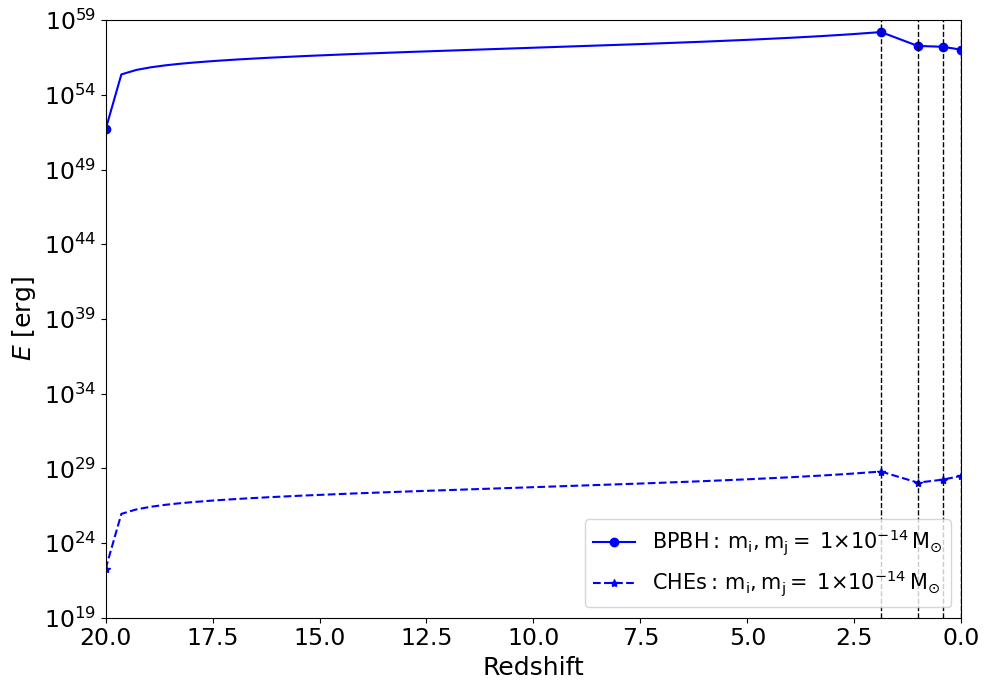

In [27]:
# --- Graficado ---
plt.figure(figsize=(10, 7))

#plt.plot(critical_time_gyr, critical_Edot, 'o', color='red', markersize=10, label=f'First CHEs in all radii\n({critical_time_yr/1e9:.3e} yr)')
#plt.plot(critical_merger_gyr, critical_merger_Edot, '*', color='black', markersize=10, label=f'First BPBHs in all radii\n({critical_merger_age_gyr:.3f} Gyr)')

plt.plot(redshift_evaluated_0[1], E_dot_CHES_0[1], '*',linestyle='--',color='blue')
plt.plot(redshift_evaluated_0[1], E_dot_BBH_0[1], 'o',color='blue')




# Periodo inicial (emisión continua previa a las generaciones discretas)
plt.plot(redshift_evaluated_0[1:], E_dot_CHES_0[1:], linestyle='--',color='blue')
plt.plot(redshift_evaluated_0[1:], E_dot_BBH_0[1:], color='blue')

# Corte entre periodos (valores totales por generación)
plt.plot(Z_PERIOD_tot[:4], EMISSION_GW_OF_BPBH[:4], color='blue', marker='o',
         label=r'${\rm BPBH: \, m_{i}, m_{j} =}\;1{\times10^{-14}}\,{\rm M}_{\odot}$')

# Segunda generación
#plt.plot(Z_PERIOD_tot[1:], EMISSION_GW_BPBH_0G1G[1:], color='deepskyblue',  marker='o',
#         label=r'${\rm BPBH: \, m_{1}}=\;10\,{\rm M}_{\odot}, m_{2} =  18\,{\rm M}_{\odot}$')
#plt.plot(Z_PERIOD_tot[1:3], EMISSION_GW_BPBH_1G1G[1:3], color='orange', marker='o',
#        label=r'${\rm BPBH: \, m_{1}, m_{2} =}\;18\,{\rm M}_{\odot}$')
#plt.plot(Z_PERIOD_tot[2:], EMISSION_GW_BPBH_1G2G_a[2:], color='green', marker='o',
#        label=r'${\rm BPBH: \, m_{1}}=\;18\,{\rm M}_{\odot}, {\rm m}_{2} =  27\,{\rm M}_{\odot}$')

plt.plot(Z_PERIOD_tot, EMISSION_GW_OF_CHES, color='blue', linestyle='--', marker='*',
         label=r'${\rm CHEs:  \, m_{i}, m_{j} =}\;1{\times10^{-14}}\,{\rm M}_{\odot}$')

#plt.plot(Z_PERIOD_tot[1:], EMISSION_GW_CHES_0G1G[1:], color='deepskyblue', linestyle='--', marker='*',
#         label=r'${\rm CHEs: \, m_{1}}=\;10\,{\rm M}_{\odot}, m_{2} =  18\,{\rm M}_{\odot}$')
#plt.plot(Z_PERIOD_tot[1:], EMISSION_GW_CHES_1G1G[1:], color='orange', linestyle='--', marker='*',
#        label=r'${\rm CHEs: \, m_{1}, m_{2} =}\;18\,{\rm M}_{\odot}$')

# Tercera generación
#plt.plot(Z_PERIOD_tot, EMISSION_GW_BPBH_1G2G_a, color='cyan')
#plt.plot(Z_PERIOD_tot, EMISSION_GW_CHES_2G_a2G_a, color='cyan')
#plt.plot(Z_PERIOD_tot, EMISSION_GW_CHES_1G2G_a, color='lightblue')
# ... resto de combinaciones 3G

# Cuarta generación (puedes darle otro color)
#plt.plot(Z_PERIOD_tot[2:], EMISSION_GW_CHES_1G2G_a[2:], color='green', linestyle='--', marker='*',
#         label=r'${\rm CHEs: \, m_{1}}=\;18\,{\rm M}_{\odot}, {\rm m}_{2} =  27\,{\rm M}_{\odot}$')


# --- Líneas verticales (periods) ---
for i, z in enumerate(Z_PERIOD_tot):
    if i == 0:  # solo la primera con leyenda
        plt.axvline(x=z, color='black', linestyle='--', linewidth=1.)
    else:
        plt.axvline(x=z, color='black', linestyle='--', linewidth=1.)

# Ajustes de eje
plt.gca().invert_xaxis()
plt.xlim([20.,0.0])
plt.ylim([1e19, 1e59])
plt.xlabel('Redshift', fontsize=18)
plt.ylabel(r'$E$ [erg]', fontsize=18)
plt.yscale('log')
#plt.xscale('log')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)


# --- Leyenda centrada arriba ---
plt.legend(
    fontsize=15,
    loc='lower right',
    #bbox_to_anchor=(0.5, 1.08),  # ajusta altura de la leyenda
)

# --- Guardado evitando cortes ---
plt.tight_layout()
plt.savefig('Updates/GW_power_vs_redshift_4generations_1e-14M_first.pdf', bbox_inches='tight')
plt.show()

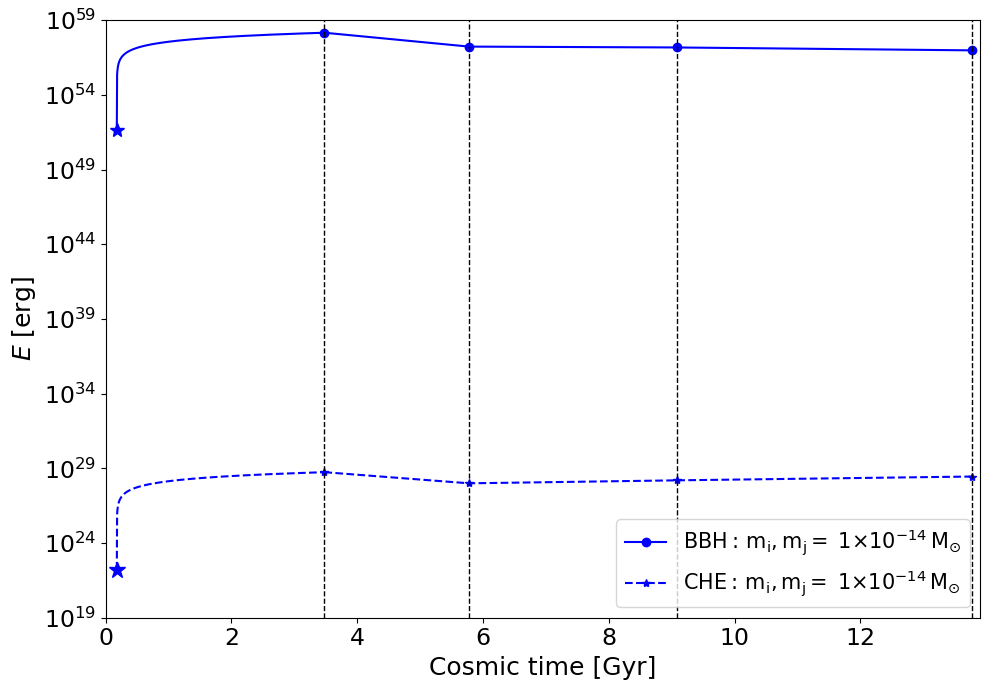

In [28]:
from astropy.cosmology import Planck18 as cosmo

# convertir arrays de redshift a tiempo cósmico [Gyr]
time_evaluated_0 = cosmo.age(redshift_evaluated_0).value  # Gyr
time_periods = cosmo.age(Z_PERIOD_tot).value  # Gyr

plt.figure(figsize=(10, 7))

# primeros eventos
plt.plot(time_evaluated_0[1], E_dot_CHES_0[1]*0.9, '*', color='blue', markersize=12)
plt.plot(time_evaluated_0[1], E_dot_BBH_0[1]*0.9, '*', color='blue', markersize=10)

# curvas completas
plt.plot(time_evaluated_0[1:], np.array(E_dot_CHES_0[1:])*0.9, '--', color='blue')
plt.plot(time_evaluated_0[1:], E_dot_BBH_0[1:]*0.9, '-', color='blue')

# periodos discretos (BPBH y CHEs)
plt.plot(time_periods[:4], np.array(EMISSION_GW_OF_BPBH[:4])*0.9, color='blue', marker='o',
         label=r'${\rm BBH:  \, m_{i}, m_{j} =}\;1{\times10^{-14}}\,{\rm M}_{\odot}$')
plt.plot(time_periods, np.array(EMISSION_GW_OF_CHES)*0.9, color='blue', linestyle='--', marker='*',
         label=r'${\rm CHE:  \, m_{i}, m_{j} =}\;1{\times10^{-14}}\,{\rm M}_{\odot}$')

# líneas verticales (intervalos de tiempo)
for t in time_periods:
    plt.axvline(x=t, color='black', linestyle='--', linewidth=1)

# ajustes de ejes
#plt.xlim([0, max(time_evaluated_0)])   # tiempo crece hacia la derecha
plt.ylim([1e19, 1e59])
plt.xlim([0, 13.9])
plt.xlabel('Cosmic time [Gyr]', fontsize=18)
plt.ylabel(r'$E$ [erg]', fontsize=18)
plt.yscale('log')
#plt.xscale('log')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

# leyenda
plt.legend(fontsize=15, loc='lower right')

plt.tight_layout()
plt.savefig('Updates/GW_power_vs_time_4generations_1e-14M_GYR.pdf', bbox_inches='tight')
plt.show()


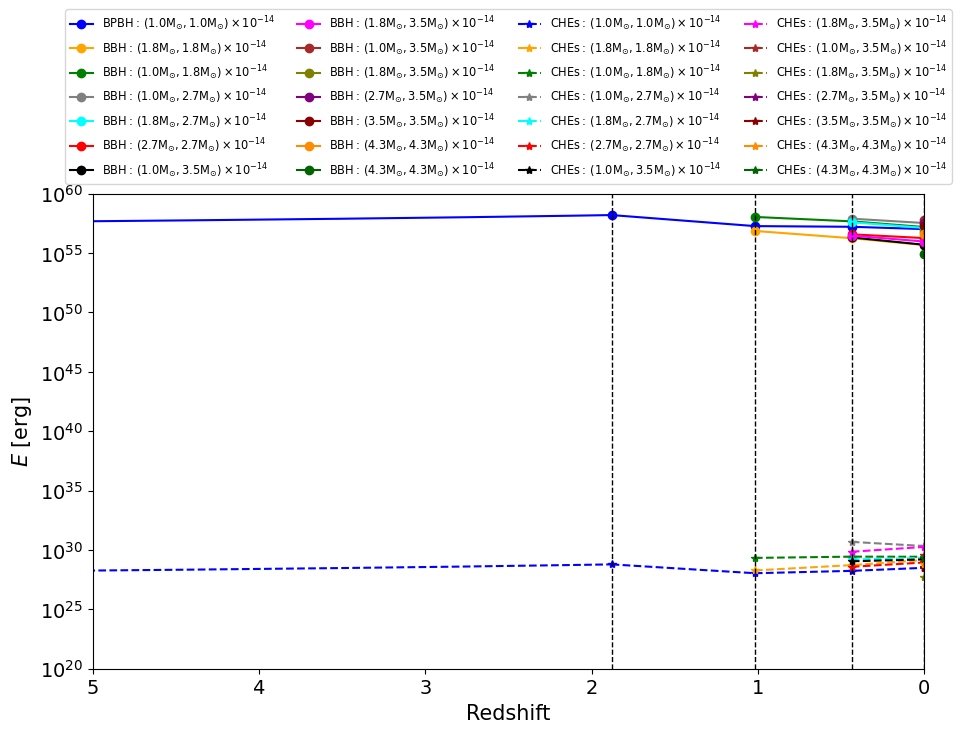

In [29]:
# --- Graficado ---
plt.figure(figsize=(10, 8))

# ================================
# Periodo inicial
# ================================
plt.plot(redshift_evaluated_0[1], E_dot_CHES_0[1], '*', linestyle='--', color='blue')
plt.plot(redshift_evaluated_0[1], E_dot_BBH_0[1], 'o', color='blue')
plt.plot(redshift_evaluated_0[1:], E_dot_CHES_0[1:], linestyle='--', color='blue')
plt.plot(redshift_evaluated_0[1:], E_dot_BBH_0[1:], color='blue')

# ================================
# BPBH
# ================================
plt.plot(Z_PERIOD_tot, EMISSION_GW_OF_BPBH, color='blue', marker='o',
         label=r'${\rm BPBH: \, (1.0M_{\odot},1.0M_{\odot})\times10^{-14}}$')

plt.plot(Z_PERIOD_tot[1:4], EMISSION_GW_BPBH_1G1G[1:4], color='orange', marker='o',
         label=r'${\rm BBH: \, (1.8M_{\odot},1.8M_{\odot})\times10^{-14}}$')
plt.plot(Z_PERIOD_tot[1:], EMISSION_GW_BPBH_0G1G[1:], color='green', marker='o',
         label=r'${\rm BBH: \, (1.0M_{\odot},1.8M_{\odot})\times10^{-14}}$')
plt.plot(Z_PERIOD_tot[2:4], EMISSION_GW_BPBH_0G2G_a[2:4], color='grey', marker='o',
         label=r'${\rm BBH: \, (1.0M_{\odot},2.7M_{\odot})\times10^{-14}}$')
plt.plot(Z_PERIOD_tot[2:4], EMISSION_GW_BPBH_1G2G_a[2:4], color='cyan', marker='o',
         label=r'${\rm BBH: \, (1.8M_{\odot},2.7M_{\odot})\times10^{-14}}$')
plt.plot(Z_PERIOD_tot[2:4], EMISSION_GW_BPBH_2G_a2G_a[2:4], color='red', marker='o',
         label=r'${\rm BBH: \, (2.7M_{\odot},2.7M_{\odot})\times10^{-14}}$')
plt.plot(Z_PERIOD_tot[2:4], EMISSION_GW_BPBH_0G2G_b[2:4], color='black', marker='o',
         label=r'${\rm BBH: \, (1.0M_{\odot},3.5M_{\odot})\times10^{-14}}$')
plt.plot(Z_PERIOD_tot[2:4], EMISSION_GW_BPBH_1G2G_b[2:4], color='magenta', marker='o',
         label=r'${\rm BBH: \, (1.8M_{\odot},3.5M_{\odot})\times10^{-14}}$')

plt.plot(Z_PERIOD_tot[3:4], EMISSION_GW_BPBH_0G3G_a, color='brown', marker='o',
         label=r'${\rm BBH: \, (1.0M_{\odot},3.5M_{\odot})\times10^{-14}}$')
plt.plot(Z_PERIOD_tot[3:4], EMISSION_GW_BPBH_1G3G_a, color='olive', marker='o',
         label=r'${\rm BBH: \, (1.8M_{\odot},3.5M_{\odot})\times10^{-14}}$')
plt.plot(Z_PERIOD_tot[3:4], EMISSION_GW_BPBH_2G_a3G_a, color='purple', marker='o',
         label=r'${\rm BBH: \, (2.7M_{\odot},3.5M_{\odot})\times10^{-14}}$')

plt.plot(Z_PERIOD_tot[3:4], EMISSION_GW_BPBH_3G_a3G_a, color='darkred', marker='o',
         label=r'${\rm BBH: \, (3.5M_{\odot},3.5M_{\odot})\times10^{-14}}$')
plt.plot(Z_PERIOD_tot[3:4], EMISSION_GW_BPBH_3G_b3G_b, color='darkorange', marker='o',
         label=r'${\rm BBH: \, (4.3M_{\odot},4.3M_{\odot})\times10^{-14}}$')
plt.plot(Z_PERIOD_tot[3:4], EMISSION_GW_BPBH_3G_c3G_c, color='darkgreen', marker='o',
         label=r'${\rm BBH: \, (4.3M_{\odot},4.3M_{\odot})\times10^{-14}}$')


# ================================
# CHEs
# ================================
plt.plot(Z_PERIOD_tot, EMISSION_GW_OF_CHES, color='blue', linestyle='--', marker='*',
         label=r'${\rm CHEs: \, (1.0M_{\odot},1.0M_{\odot})\times10^{-14}}$')

plt.plot(Z_PERIOD_tot[1:], EMISSION_GW_CHES_1G1G[1:], color='orange', linestyle='--', marker='*',
         label=r'${\rm CHEs: \, (1.8M_{\odot},1.8M_{\odot})\times10^{-14}}$')
plt.plot(Z_PERIOD_tot[1:], EMISSION_GW_CHES_0G1G[1:], color='green', linestyle='--', marker='*',
         label=r'${\rm CHEs: \, (1.0M_{\odot},1.8M_{\odot})\times10^{-14}}$')
plt.plot(Z_PERIOD_tot[2:4], EMISSION_GW_CHES_0G2G_a[2:4], color='grey', linestyle='--', marker='*',
         label=r'${\rm CHEs: \, (1.0M_{\odot},2.7M_{\odot})\times10^{-14}}$')
plt.plot(Z_PERIOD_tot[2:4], EMISSION_GW_CHES_1G2G_a[2:4], color='cyan', linestyle='--', marker='*',
         label=r'${\rm CHEs: \, (1.8M_{\odot},2.7M_{\odot})\times10^{-14}}$')
plt.plot(Z_PERIOD_tot[2:4], EMISSION_GW_CHES_2G_a2G_a[2:4], color='red', linestyle='--', marker='*',
         label=r'${\rm CHEs: \, (2.7M_{\odot},2.7M_{\odot})\times10^{-14}}$')
plt.plot(Z_PERIOD_tot[2:4], EMISSION_GW_CHES_0G2G_b[2:4], color='black', linestyle='--', marker='*',
         label=r'${\rm CHEs: \, (1.0M_{\odot},3.5M_{\odot})\times10^{-14}}$')
plt.plot(Z_PERIOD_tot[2:4], EMISSION_GW_CHES_1G2G_b[2:4], color='magenta', linestyle='--', marker='*',
         label=r'${\rm CHEs: \, (1.8M_{\odot},3.5M_{\odot})\times10^{-14}}$')

plt.plot(Z_PERIOD_tot[3:4], EMISSION_GW_CHES_0G3G_a, color='brown', linestyle='--', marker='*',
         label=r'${\rm CHEs: \, (1.0M_{\odot},3.5M_{\odot})\times10^{-14}}$')
plt.plot(Z_PERIOD_tot[3:4], EMISSION_GW_CHES_1G3G_a, color='olive', linestyle='--', marker='*',
         label=r'${\rm CHEs: \, (1.8M_{\odot},3.5M_{\odot})\times10^{-14}}$')
plt.plot(Z_PERIOD_tot[3:4], EMISSION_GW_CHES_2G_a3G_a, color='purple', linestyle='--', marker='*',
         label=r'${\rm CHEs: \, (2.7M_{\odot},3.5M_{\odot})\times10^{-14}}$')

plt.plot(Z_PERIOD_tot[3:4], EMISSION_GW_CHES_3G_a3G_a, color='darkred', linestyle='--', marker='*',
         label=r'${\rm CHEs: \, (3.5M_{\odot},3.5M_{\odot})\times10^{-14}}$')
plt.plot(Z_PERIOD_tot[3:4], EMISSION_GW_CHES_3G_b3G_b, color='darkorange', linestyle='--', marker='*',
         label=r'${\rm CHEs: \, (4.3M_{\odot},4.3M_{\odot})\times10^{-14}}$')
plt.plot(Z_PERIOD_tot[3:4], EMISSION_GW_CHES_3G_c3G_c, color='darkgreen', linestyle='--', marker='*',
         label=r'${\rm CHEs: \, (4.3M_{\odot},4.3M_{\odot})\times10^{-14}}$')

# --- Líneas verticales (periods) ---
for i, z in enumerate(Z_PERIOD_tot):
    if i == 0:  # solo la primera con leyenda
        plt.axvline(x=z, color='black', linestyle='--', linewidth=1.)
    else:
        plt.axvline(x=z, color='black', linestyle='--', linewidth=1.)


# ================================
# Ajustes de gráfico
# ================================
plt.gca().invert_xaxis()
plt.xlim([5.0,0.0])
plt.ylim([1e20,1e60])
plt.xlabel('Redshift', fontsize=15)
plt.ylabel(r'$E$ [erg]', fontsize=15)
plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(
    fontsize=8.2,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.4),
    ncol=4
)
plt.tight_layout()
plt.savefig('Updates/GW_power_vs_redshift_4epochs_1e-14M_a.pdf')
plt.show()


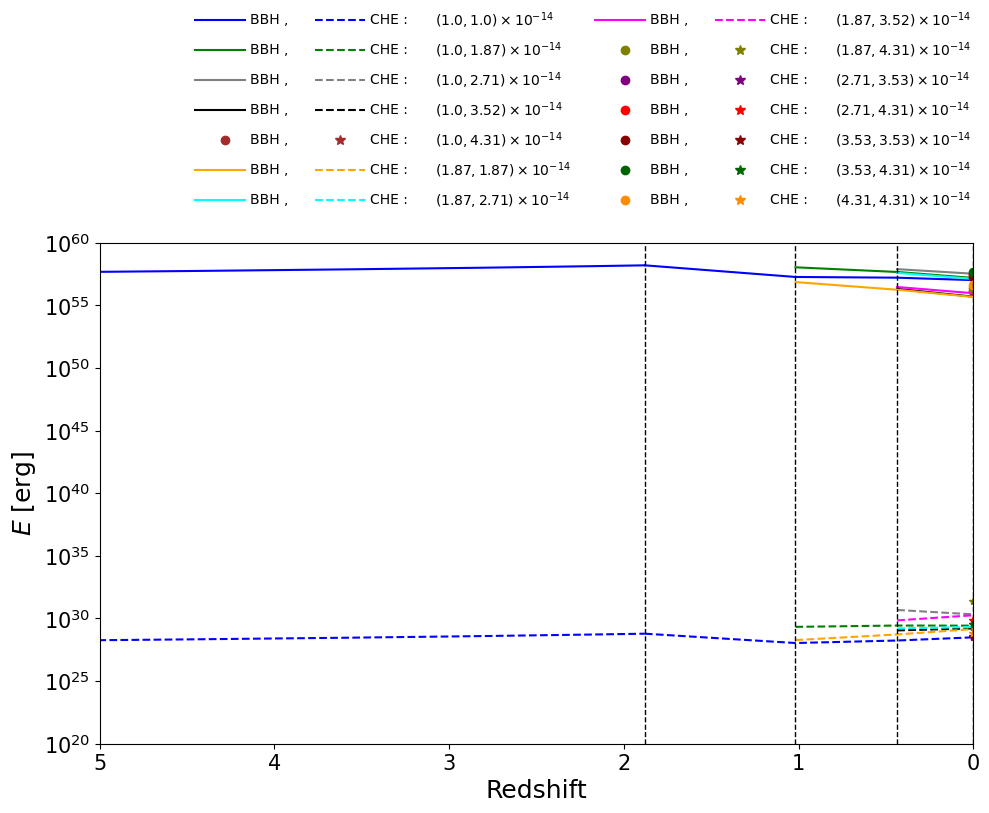

In [39]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(10,6))


plt.plot(redshift_evaluated_0[1], E_dot_CHES_0[1], '*', linestyle='--', color='blue')
plt.plot(redshift_evaluated_0[1], E_dot_BBH_0[1], 'o', color='blue')
plt.plot(redshift_evaluated_0[1:], E_dot_CHES_0[1:], linestyle='--', color='blue')
plt.plot(redshift_evaluated_0[1:], E_dot_BBH_0[1:], color='blue')

# ================================
# Curvas reales (incluyendo slices de Z_PERIOD_tot) - versión 1e-14
# ================================
series_info = {
    r"$(1.0,1.0)\times10^{-14}$":       ("blue",      (Z_PERIOD_tot,        EMISSION_GW_OF_BPBH),       (Z_PERIOD_tot,        EMISSION_GW_OF_CHES)),
    r"$(1.0,1.87)\times10^{-14}$":      ("green",     (Z_PERIOD_tot[1:],    EMISSION_GW_BPBH_0G1G[1:]), (Z_PERIOD_tot[1:],    EMISSION_GW_CHES_0G1G[1:])),
    r"$(1.0,2.71)\times10^{-14}$":      ("grey",      (Z_PERIOD_tot[2:4],   EMISSION_GW_BPBH_0G2G_a[2:4]),(Z_PERIOD_tot[2:4],  EMISSION_GW_CHES_0G2G_a[2:4])),    
    r"$(1.0,3.52)\times10^{-14}$":      ("black",     (Z_PERIOD_tot[2:4],   EMISSION_GW_BPBH_0G2G_b[2:4]),(Z_PERIOD_tot[2:4],  EMISSION_GW_CHES_0G2G_b[2:4])),
#   r"$(1.0,3.53)\times10^{-14}$":      ("brown",     (Z_PERIOD_tot[3:4],   EMISSION_GW_BPBH_0G3G_a),    (Z_PERIOD_tot[3:4],  EMISSION_GW_CHES_0G3G_a)),
    r"$(1.0,4.31)\times10^{-14}$":      ("brown",     (Z_PERIOD_tot[3:4],   EMISSION_GW_BPBH_0G3G_c),    (Z_PERIOD_tot[3:4],  EMISSION_GW_CHES_0G3G_c)),
    r"$(1.87,1.87)\times10^{-14}$":     ("orange",    (Z_PERIOD_tot[1:4],   EMISSION_GW_BPBH_1G1G[1:4]), (Z_PERIOD_tot[1:],    EMISSION_GW_CHES_1G1G[1:])),
    r"$(1.87,2.71)\times10^{-14}$":     ("cyan",      (Z_PERIOD_tot[2:4],   EMISSION_GW_BPBH_1G2G_a[2:4]),(Z_PERIOD_tot[2:4],  EMISSION_GW_CHES_1G2G_a[2:4])),
    r"$(1.87,3.52)\times10^{-14}$":     ("magenta",   (Z_PERIOD_tot[2:4],   EMISSION_GW_BPBH_1G2G_b[2:4]),(Z_PERIOD_tot[2:4],  EMISSION_GW_CHES_1G2G_b[2:4])),
#   r"$(1.87,3.53)\times10^{-14}$":     ("olive",     (Z_PERIOD_tot[3:4],   EMISSION_GW_BPBH_1G3G_a),    (Z_PERIOD_tot[3:4],  EMISSION_GW_CHES_1G3G_a)),
    r"$(1.87,4.31)\times10^{-14}$":     ("olive",     (Z_PERIOD_tot[3:4],   EMISSION_GW_BPBH_1G3G_c),    (Z_PERIOD_tot[3:4],  EMISSION_GW_CHES_1G3G_c)),
#   r"$(2.71,2.71)\times10^{-14}$":     ("red",       (Z_PERIOD_tot[2:4],   EMISSION_GW_BPBH_2G_a2G_a[2:4]),(Z_PERIOD_tot[2:4], EMISSION_GW_CHES_2G_a2G_a[2:4])),
    r"$(2.71,3.53)\times10^{-14}$":     ("purple",    (Z_PERIOD_tot[3:4],   EMISSION_GW_BPBH_2G_a3G_a),  (Z_PERIOD_tot[3:4],  EMISSION_GW_CHES_2G_a3G_a)),
    r"$(2.71,4.31)\times10^{-14}$":     ("red",       (Z_PERIOD_tot[3:4],   EMISSION_GW_BPBH_2G_a3G_b),  (Z_PERIOD_tot[3:4],  EMISSION_GW_CHES_2G_a3G_b)),
#   r"$(4.33,4.33)\times10^{-14}$":     ("darkgreen", (Z_PERIOD_tot[3:4],   EMISSION_GW_BPBH_3G_c3G_c),  (Z_PERIOD_tot[3:4],  EMISSION_GW_CHES_3G_c3G_c)),    
    r"$(3.53,3.53)\times10^{-14}$":     ("darkred",   (Z_PERIOD_tot[3:4],   EMISSION_GW_BPBH_3G_a3G_a),  (Z_PERIOD_tot[3:4],  EMISSION_GW_CHES_3G_a3G_a)),
    r"$(3.53,4.31)\times10^{-14}$":     ("darkgreen", (Z_PERIOD_tot[3:4],   EMISSION_GW_BPBH_3G_a3G_b),  (Z_PERIOD_tot[3:4],  EMISSION_GW_CHES_3G_a3G_b)),
    r"$(4.31,4.31)\times10^{-14}$":     ("darkorange",(Z_PERIOD_tot[3:4],   EMISSION_GW_BPBH_3G_b3G_b),  (Z_PERIOD_tot[3:4],  EMISSION_GW_CHES_3G_b3G_b)),
#   r"$(4.33,4.33)\times10^{-14}$":     ("darkgreen", (Z_PERIOD_tot[3:4],   EMISSION_GW_BPBH_3G_c3G_c),  (Z_PERIOD_tot[3:4],  EMISSION_GW_CHES_3G_c3G_c)),
}

# Dibujar curvas reales
for masses, (color, (z_bbh, bbh_data), (z_che, che_data)) in series_info.items():
    # --- BBH ---
    if len(bbh_data) > 1:
        ax.plot(z_bbh, bbh_data, color=color, linestyle='-')
    else:
        ax.plot(z_bbh, bbh_data, color=color, marker='o', linestyle='None')
    # --- CHE ---
    if len(che_data) > 1:
        ax.plot(z_che, che_data, color=color, linestyle='--')
    else:
        ax.plot(z_che, che_data, color=color, marker='*', linestyle='None')

# ================================
# Líneas verticales (periodos)
# ================================
for z in Z_PERIOD_tot:
    ax.axvline(x=z, color='black', linestyle='--', linewidth=1.)

# ================================
# Leyenda personalizada fuera de la gráfica
# ================================
ncols = 2
nrows = (len(series_info) + ncols - 1) // ncols
start_y = 1.33
dy = 0.05

for i, (masses, (color, (z_bbh, bbh_data), (z_che, che_data))) in enumerate(series_info.items()):
    col = i // nrows
    row = i % nrows
    y = start_y - row*dy
    x = 0.20 + col*0.4

    # --- BBH ---
    if len(bbh_data) > 1:
        fig.add_artist(mlines.Line2D([x, x+0.05], [y, y],
                                     transform=fig.transFigure,
                                     color=color, linestyle='-', linewidth=1.5))
    else:
        fig.add_artist(mlines.Line2D([x+0.03], [y],
                                     transform=fig.transFigure,
                                     color=color, marker='o', linestyle='None', markersize=6))
    fig.text(x+0.055, y, "BBH ,", va="center", fontsize=10, transform=fig.transFigure)

    # --- CHE ---
    if len(che_data) > 1:
        fig.add_artist(mlines.Line2D([x+0.12, x+0.17], [y, y],
                                     transform=fig.transFigure,
                                     color=color, linestyle='--', linewidth=1.5))
    else:
        fig.add_artist(mlines.Line2D([x+0.145], [y],
                                     transform=fig.transFigure,
                                     color=color, marker='*', linestyle='None', markersize=7))
    fig.text(x+0.175, y, "CHE :", va="center", fontsize=10, transform=fig.transFigure)

    # --- Masas ---
    fig.text(x+0.24, y, masses, va="center", fontsize=10,
             color="black", transform=fig.transFigure)

# ================================
# Ajustes generales
# ================================
ax.set_xlabel('Redshift', fontsize=18)
ax.set_ylabel(r'$E$ [erg]', fontsize=18)
ax.set_yscale('log')
ax.invert_xaxis()
ax.set_xlim([5.0, 0.0])
plt.ylim([1e20,1e60])
ax.tick_params(axis='both', labelsize=15)

plt.tight_layout()
plt.savefig(
    'Updates/GW_power_vs_redshift_4epochs_1e-14M_a.pdf',
    bbox_inches="tight"
)
plt.show()

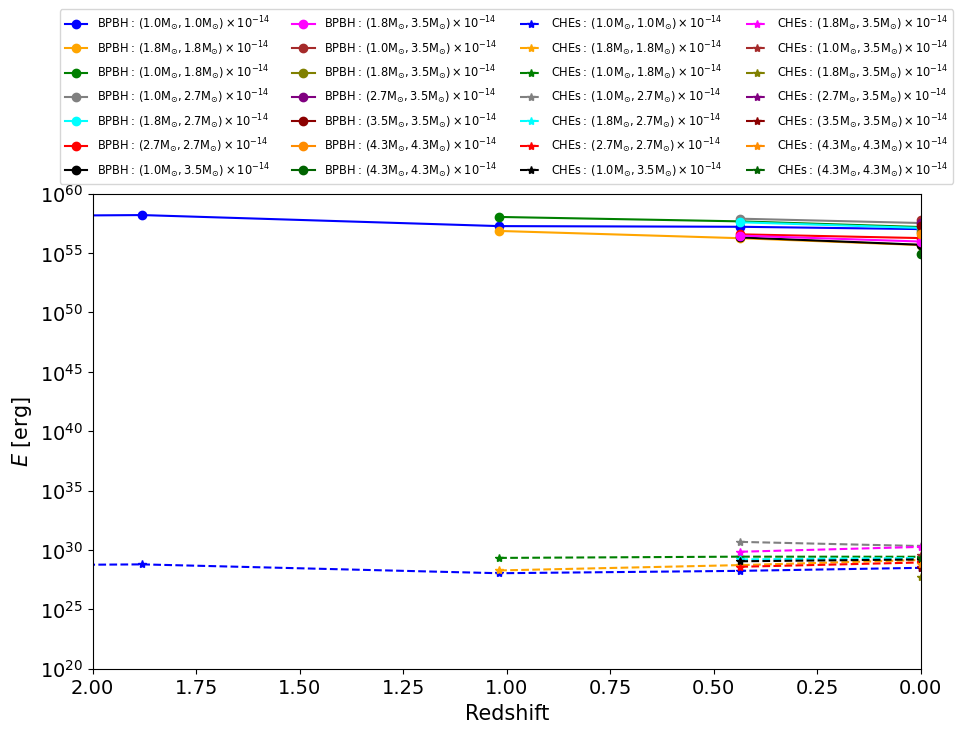

In [31]:
# --- Graficado ---
plt.figure(figsize=(10, 8))

# ================================
# Periodo inicial
# ================================
plt.plot(redshift_evaluated_0[1], E_dot_CHES_0[1], '*', linestyle='--', color='blue')
plt.plot(redshift_evaluated_0[1], E_dot_BBH_0[1], 'o', color='blue')
plt.plot(redshift_evaluated_0[1:], E_dot_CHES_0[1:], linestyle='--', color='blue')
plt.plot(redshift_evaluated_0[1:], E_dot_BBH_0[1:], color='blue')

# ================================
# BPBH
# ================================
plt.plot(Z_PERIOD_tot, EMISSION_GW_OF_BPBH, color='blue', marker='o',
         label=r'${\rm BPBH: \, (1.0M_{\odot},1.0M_{\odot})\times10^{-14}}$')

plt.plot(Z_PERIOD_tot[1:4], EMISSION_GW_BPBH_1G1G[1:4], color='orange', marker='o',
         label=r'${\rm BPBH: \, (1.8M_{\odot},1.8M_{\odot})\times10^{-14}}$')
plt.plot(Z_PERIOD_tot[1:], EMISSION_GW_BPBH_0G1G[1:], color='green', marker='o',
         label=r'${\rm BPBH: \, (1.0M_{\odot},1.8M_{\odot})\times10^{-14}}$')
plt.plot(Z_PERIOD_tot[2:4], EMISSION_GW_BPBH_0G2G_a[2:4], color='grey', marker='o',
         label=r'${\rm BPBH: \, (1.0M_{\odot},2.7M_{\odot})\times10^{-14}}$')
plt.plot(Z_PERIOD_tot[2:4], EMISSION_GW_BPBH_1G2G_a[2:4], color='cyan', marker='o',
         label=r'${\rm BPBH: \, (1.8M_{\odot},2.7M_{\odot})\times10^{-14}}$')
plt.plot(Z_PERIOD_tot[2:4], EMISSION_GW_BPBH_2G_a2G_a[2:4], color='red', marker='o',
         label=r'${\rm BPBH: \, (2.7M_{\odot},2.7M_{\odot})\times10^{-14}}$')
plt.plot(Z_PERIOD_tot[2:4], EMISSION_GW_BPBH_0G2G_b[2:4], color='black', marker='o',
         label=r'${\rm BPBH: \, (1.0M_{\odot},3.5M_{\odot})\times10^{-14}}$')
plt.plot(Z_PERIOD_tot[2:4], EMISSION_GW_BPBH_1G2G_b[2:4], color='magenta', marker='o',
         label=r'${\rm BPBH: \, (1.8M_{\odot},3.5M_{\odot})\times10^{-14}}$')

plt.plot(Z_PERIOD_tot[3:4], EMISSION_GW_BPBH_0G3G_a, color='brown', marker='o',
         label=r'${\rm BPBH: \, (1.0M_{\odot},3.5M_{\odot})\times10^{-14}}$')
plt.plot(Z_PERIOD_tot[3:4], EMISSION_GW_BPBH_1G3G_a, color='olive', marker='o',
         label=r'${\rm BPBH: \, (1.8M_{\odot},3.5M_{\odot})\times10^{-14}}$')
plt.plot(Z_PERIOD_tot[3:4], EMISSION_GW_BPBH_2G_a3G_a, color='purple', marker='o',
         label=r'${\rm BPBH: \, (2.7M_{\odot},3.5M_{\odot})\times10^{-14}}$')

plt.plot(Z_PERIOD_tot[3:4], EMISSION_GW_BPBH_3G_a3G_a, color='darkred', marker='o',
         label=r'${\rm BPBH: \, (3.5M_{\odot},3.5M_{\odot})\times10^{-14}}$')
plt.plot(Z_PERIOD_tot[3:4], EMISSION_GW_BPBH_3G_b3G_b, color='darkorange', marker='o',
         label=r'${\rm BPBH: \, (4.3M_{\odot},4.3M_{\odot})\times10^{-14}}$')
plt.plot(Z_PERIOD_tot[3:4], EMISSION_GW_BPBH_3G_c3G_c, color='darkgreen', marker='o',
         label=r'${\rm BPBH: \, (4.3M_{\odot},4.3M_{\odot})\times10^{-14}}$')


# ================================
# CHEs
# ================================
plt.plot(Z_PERIOD_tot, EMISSION_GW_OF_CHES, color='blue', linestyle='--', marker='*',
         label=r'${\rm CHEs: \, (1.0M_{\odot},1.0M_{\odot})\times10^{-14}}$')

plt.plot(Z_PERIOD_tot[1:], EMISSION_GW_CHES_1G1G[1:], color='orange', linestyle='--', marker='*',
         label=r'${\rm CHEs: \, (1.8M_{\odot},1.8M_{\odot})\times10^{-14}}$')
plt.plot(Z_PERIOD_tot[1:], EMISSION_GW_CHES_0G1G[1:], color='green', linestyle='--', marker='*',
         label=r'${\rm CHEs: \, (1.0M_{\odot},1.8M_{\odot})\times10^{-14}}$')
plt.plot(Z_PERIOD_tot[2:4], EMISSION_GW_CHES_0G2G_a[2:4], color='grey', linestyle='--', marker='*',
         label=r'${\rm CHEs: \, (1.0M_{\odot},2.7M_{\odot})\times10^{-14}}$')
plt.plot(Z_PERIOD_tot[2:4], EMISSION_GW_CHES_1G2G_a[2:4], color='cyan', linestyle='--', marker='*',
         label=r'${\rm CHEs: \, (1.8M_{\odot},2.7M_{\odot})\times10^{-14}}$')
plt.plot(Z_PERIOD_tot[2:4], EMISSION_GW_CHES_2G_a2G_a[2:4], color='red', linestyle='--', marker='*',
         label=r'${\rm CHEs: \, (2.7M_{\odot},2.7M_{\odot})\times10^{-14}}$')
plt.plot(Z_PERIOD_tot[2:4], EMISSION_GW_CHES_0G2G_b[2:4], color='black', linestyle='--', marker='*',
         label=r'${\rm CHEs: \, (1.0M_{\odot},3.5M_{\odot})\times10^{-14}}$')
plt.plot(Z_PERIOD_tot[2:4], EMISSION_GW_CHES_1G2G_b[2:4], color='magenta', linestyle='--', marker='*',
         label=r'${\rm CHEs: \, (1.8M_{\odot},3.5M_{\odot})\times10^{-14}}$')

plt.plot(Z_PERIOD_tot[3:4], EMISSION_GW_CHES_0G3G_a, color='brown', linestyle='--', marker='*',
         label=r'${\rm CHEs: \, (1.0M_{\odot},3.5M_{\odot})\times10^{-14}}$')
plt.plot(Z_PERIOD_tot[3:4], EMISSION_GW_CHES_1G3G_a, color='olive', linestyle='--', marker='*',
         label=r'${\rm CHEs: \, (1.8M_{\odot},3.5M_{\odot})\times10^{-14}}$')
plt.plot(Z_PERIOD_tot[3:4], EMISSION_GW_CHES_2G_a3G_a, color='purple', linestyle='--', marker='*',
         label=r'${\rm CHEs: \, (2.7M_{\odot},3.5M_{\odot})\times10^{-14}}$')

plt.plot(Z_PERIOD_tot[3:4], EMISSION_GW_CHES_3G_a3G_a, color='darkred', linestyle='--', marker='*',
         label=r'${\rm CHEs: \, (3.5M_{\odot},3.5M_{\odot})\times10^{-14}}$')
plt.plot(Z_PERIOD_tot[3:4], EMISSION_GW_CHES_3G_b3G_b, color='darkorange', linestyle='--', marker='*',
         label=r'${\rm CHEs: \, (4.3M_{\odot},4.3M_{\odot})\times10^{-14}}$')
plt.plot(Z_PERIOD_tot[3:4], EMISSION_GW_CHES_3G_c3G_c, color='darkgreen', linestyle='--', marker='*',
         label=r'${\rm CHEs: \, (4.3M_{\odot},4.3M_{\odot})\times10^{-14}}$')


# ================================
# Ajustes de gráfico
# ================================
plt.gca().invert_xaxis()
plt.xlim([2.0,0.0])
plt.ylim([1e20,1e60])
plt.xlabel('Redshift', fontsize=15)
plt.ylabel(r'$E$ [erg]', fontsize=15)
plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(
    fontsize=8.2,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.4),
    ncol=4
)
plt.tight_layout()
plt.savefig('Updates/GW_power_vs_redshift_4epochs_1e-14M_b.pdf')
plt.show()

In [32]:
E_tot_1e14M_BPBH = np.concatenate([E_dot_BBH_0, EMISSION_GW_OF_BPBH])

In [33]:
E_tot_1e14M_BPBH_plot = []
for i in E_tot_1e14M_BPBH:
    E_tot_1e14M_BPBH_plot.append(i)

print(E_tot_1e14M_BPBH_plot)

[0.0, 4.812359493348136e+51, 2.3185283509730586e+55, 4.636575465996782e+55, 6.954622581020505e+55, 9.27266969604423e+55, 1.1590716811067951e+56, 1.3908763926091675e+56, 1.6226811041115397e+56, 1.8544858156139123e+56, 2.0862905271162844e+56, 2.3180952386186566e+56, 2.549899950121029e+56, 2.7817046616234014e+56, 3.0135093731257735e+56, 3.2453140846281466e+56, 3.4771187961305183e+56, 3.708923507632891e+56, 3.940728219135263e+56, 4.172532930637636e+56, 4.404337642140008e+56, 4.636142353642381e+56, 4.867947065144753e+56, 5.099751776647125e+56, 5.331556488149498e+56, 5.563361199651869e+56, 5.795165911154243e+56, 6.026970622656614e+56, 6.258775334158987e+56, 6.49058004566136e+56, 6.722384757163732e+56, 6.954189468666104e+56, 7.185994180168476e+56, 7.417798891670848e+56, 7.649603603173221e+56, 7.881408314675593e+56, 8.113213026177966e+56, 8.345017737680336e+56, 8.57682244918271e+56, 8.808627160685082e+56, 9.040431872187455e+56, 9.272236583689827e+56, 9.5040412951922e+56, 9.73584600669457e+56, 

In [34]:
z_plot = np.concatenate([redshift_evaluated_0, Z_PERIOD_tot])

In [35]:
z_1e14M_array = []
for i in z_plot:
    z_1e14M_array.append(i)

In [36]:
print(z_1e14M_array)

[19.9999998855453, 19.99992178498618, 19.631428714339137, 19.278700627017137, 18.94068488761014, 18.616422691588554, 18.305039715411763, 18.005736101521638, 17.71777853125511, 17.440493962318396, 17.173262741905173, 16.915513890938428, 16.666719906006445, 16.426392811537983, 16.194080548122784, 15.969363904292235, 15.751852626270102, 15.54118386152658, 15.337019532053922, 15.139043934944928, 14.94696217377647, 14.760498120645858, 14.579393370037703, 14.403405427436661, 14.232306800334712, 14.065883768433219, 13.903934767354448, 13.746270303325058, 13.592712079907521, 13.443091209907871, 13.297248695094618, 13.155033904519364, 13.016304587372737, 12.880926082107013, 12.748770576721007, 12.619716787653513, 12.493649996435368, 12.37046092268742, 12.250045894748176, 12.132306229985439, 12.017148037463478, 11.904481804540147, 11.794222275590565, 11.68628836672719, 11.580602298663075, 11.477090242822575, 11.375681389237553, 11.276308045423415, 11.178905742543414, 11.08341245704285, 10.989769

In [37]:
E_tot_1e14M_CHES_plot = np.concatenate([E_dot_CHES_0, EMISSION_GW_OF_CHES])

In [38]:
E_tot_1e14M_CHEs = []
for i in E_tot_1e14M_CHES_plot:
    E_tot_1e14M_CHEs.append(i)

print(E_tot_1e14M_CHEs)

[0.0, 1.8537256439347763e+22, 8.9309941751638e+25, 1.786013462468366e+26, 2.678927507420352e+26, 3.5718415523723386e+26, 4.464755597324327e+26, 5.3576696422763115e+26, 6.250583687228298e+26, 7.143497732180285e+26, 8.03641177713227e+26, 8.92932582208426e+26, 9.822239867036243e+26, 1.071515391198823e+27, 1.1608067956940217e+27, 1.2500982001892208e+27, 1.3393896046844188e+27, 1.4286810091796176e+27, 1.5179724136748162e+27, 1.6072638181700147e+27, 1.6965552226652138e+27, 1.7858466271604126e+27, 1.8751380316556106e+27, 1.9644294361508092e+27, 2.0537208406460082e+27, 2.1430122451412065e+27, 2.2323036496364056e+27, 2.3215950541316044e+27, 2.4108864586268027e+27, 2.500177863122002e+27, 2.5894692676172003e+27, 2.678760672112399e+27, 2.7680520766075974e+27, 2.857343481102796e+27, 2.946634885597995e+27, 3.0359262900931936e+27, 3.125217694588392e+27, 3.2145090990835906e+27, 3.3038005035787886e+27, 3.3930919080739877e+27, 3.482383312569186e+27, 3.5716747170643854e+27, 3.660966121559584e+27, 3.75025